In [1]:
cd ..

/Users/arnau/Documents/isglobal/codes/genomics


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci_stats
import pandas as pd
from genomic_tools.stats import mat_mean, mat_vals, mat_mean_err, sig2pow
from genomic_tools.relatedness import dist, L1, jaccard_dist, relatedness_mat

In [3]:
%matplotlib inline

In [4]:
save_path = '/Users/arnau/Documents/isglobal/manuscripts/genetic_magude_elimination/figures/'

### Import data

In [5]:
#Data containing the haplotype frequencies
data_file = '/Users/arnau/Documents/isglobal/genomics/data/HAPLOTYPES_Freq_Table_filtered.xlsx'

In [6]:
data_ama = pd.read_excel(data_file, index_col = 0, sheet_name = 0, usecols = range(160))
data_csp = pd.read_excel(data_file, index_col = 0, sheet_name = 1)

n_csp_haplotypes = 57
n_ama_haplotypes = 45

In [7]:
#Data containing information for the samples
data = pd.read_stata('/Users/arnau/Documents/isglobal/genomics/data/variables_arnau.dta', index_col = 'samplename')

In [8]:
#Define what column names are for pre and what for post
cols_pre = []
cols_post = []
for col in data_ama.columns:
    if 'PM' in str(col):
        cols_post.append(col)
    else:
        cols_pre.append(col)
        
#Define haplotype frequencies for all cases, 2015, 2017, pfama1 and pfcsp
genotypes_pre_ama = np.array([data_ama[col] for col in cols_pre])
genotypes_pre_ama[np.isnan(genotypes_pre_ama)] = 0.

genotypes_post_ama = np.array([data_ama[col] for col in cols_post])
genotypes_post_ama[np.isnan(genotypes_post_ama)] = 0.

genotypes_pre_csp = np.array([data_csp[col] for col in cols_pre])
genotypes_pre_csp[np.isnan(genotypes_pre_csp)] = 0.

genotypes_post_csp = np.array([data_csp[col] for col in cols_post])
genotypes_post_csp[np.isnan(genotypes_post_csp)] = 0.

Here I represent these samples, first for the pre case and second for the post. Each raw represents a sample, each column a genotype, and the colour represents the presence of this genotype for this sample (being dark blue 0 and yellow 1). You can see that the post case is more restricted to a smaller set of genotypes.  

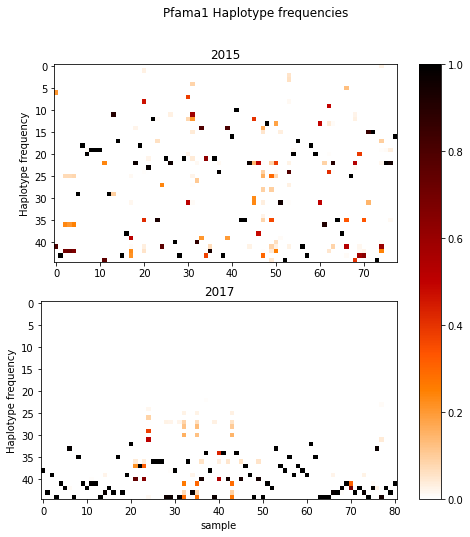

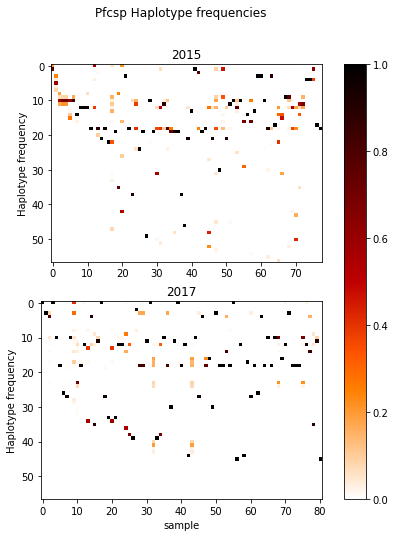

In [9]:
cmap = 'gist_heat_r'
#Pfama1
fig, axs = plt.subplots(2, 1)
fig.set_size_inches([8,8])
fig.suptitle('Pfama1 Haplotype frequencies')

images = []
images.append(axs[0].imshow(genotypes_pre_ama.T, cmap = cmap))
axs[0].set_title('2015')
axs[0].set_ylabel('Haplotype frequency')

images.append(axs[1].imshow(genotypes_post_ama.T, cmap = cmap))
axs[1].set_title('2017')
axs[1].set_xlabel('sample')
axs[1].set_ylabel('Haplotype frequency')
fig.colorbar(images[0], ax = axs)
#plt.savefig(save_path + 'haplo_freq_ama.pdf')
plt.show()


#Pfcsp
fig, axs = plt.subplots(2, 1)
fig.set_size_inches([8,8])
fig.suptitle('Pfcsp Haplotype frequencies')

images = []
images.append(axs[0].imshow(genotypes_pre_csp.T, cmap = cmap))
axs[0].set_title('2015')
axs[0].set_ylabel('Haplotype frequency')

images.append(axs[1].imshow(genotypes_post_csp.T, cmap = cmap))
axs[1].set_title('2017')
axs[1].set_xlabel('sample')
axs[1].set_ylabel('Haplotype frequency')
fig.colorbar(images[0], ax = axs)
#plt.savefig(save_path + 'haplo_freq_csp.pdf')
plt.show()

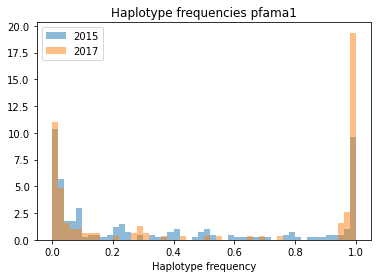

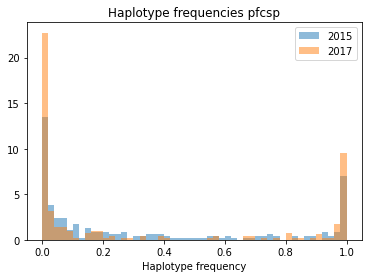

In [11]:
plt.hist(genotypes_pre_ama.flatten(), 50, range = [0.0001, 1], density = True, alpha = .5, label = '2015')
plt.hist(genotypes_post_ama.flatten(), 50, range = [0.0001, 1], density = True, alpha = .5, label = '2017')
plt.title('Haplotype frequencies pfama1')
plt.xlabel('Haplotype frequency')
plt.legend()
plt.show()

plt.hist(genotypes_pre_csp.flatten(), 50, range = [0.0001, 1], density = True, alpha = .5, label = '2015')
plt.hist(genotypes_post_csp.flatten(), 50, range = [0.0001, 1], density = True, alpha = .5, label = '2017')
plt.title('Haplotype frequencies pfcsp')
plt.xlabel('Haplotype frequency')
plt.legend()
plt.show()

To measure the similarity between samples I calculate the 50-dimensional distance of the genotype vectors (see definition and description of function dist on top of the notebook). This distance measurement give 0 when the genotype distributions are identical, and a positive value when they are different. 

In [12]:
#Pfama1
#These distance matrices show the distance between sample i and j in the matrix position (i,j)
dist_mat_pre_ama = relatedness_mat(genotypes_pre_ama, genotypes_pre_ama, method = 'L2')
dist_mat_post_ama = relatedness_mat(genotypes_post_ama, genotypes_post_ama, method = 'L2')
#dist_mat_cross = relatedness_mat(genotypes_pre, genotypes_post, method = 'L2')

l1_mat_pre_ama = relatedness_mat(genotypes_pre_ama, genotypes_pre_ama, method = 'L1')
l1_mat_post_ama = relatedness_mat(genotypes_post_ama, genotypes_post_ama, method = 'L1')
#l1_mat_cross = relatedness_mat(genotypes_pre, genotypes_post, method = 'L1')


#Pfcsp
dist_mat_pre_csp = relatedness_mat(genotypes_pre_csp, genotypes_pre_csp, method = 'L2')
dist_mat_post_csp = relatedness_mat(genotypes_post_csp, genotypes_post_csp, method = 'L2')
#dist_mat_cross = relatedness_mat(genotypes_pre, genotypes_post, method = 'L2')

l1_mat_pre_csp = relatedness_mat(genotypes_pre_csp, genotypes_pre_csp, method = 'L1')
l1_mat_post_csp = relatedness_mat(genotypes_post_csp, genotypes_post_csp, method = 'L1')
#l1_mat_cross = relatedness_mat(genotypes_pre, genotypes_post, method = 'L1')

Here I show the mean distances between pairs in pre, in post and between pre and post (cross), and below I show a histogram of the distributions of these values. 

In [13]:
def print_means(mat_pre, mat_post, text = '', diag = True):
    """This method prints the mean relatedness pre and 
    post intervention from two matrices.
    
    Parameters:
    -----------
    mat_pre: np.ndarray
        Matrix of pairwise relatedness of samples from 2015
    mat_post: np.ndarray
        Matrix of pairwise relatedness of samples from 2017
    diag: bool
        It specifies if the matrix is diagonally symmetric
        
    Returns:
    text describing the mean relatedness and the change 
    between 2015 and 2017, with the errors and power
        """
    jk_num = len(mat_pre)
    mean_pre, err_pre = mat_mean_err(mat_pre, jk_num, diag = diag)
    print("Mean 2015 "+text+": " + str(mean_pre) + " +/- " + str(err_pre))
    jk_num = len(mat_post)
    mean_post, err_post = mat_mean_err(mat_post, jk_num, diag = diag)
    print("Mean 2017 "+text+": " + str(mean_post) + " +/- " + str(err_post))
    diff_means = mean_post - mean_pre 
    diff_err = np.sqrt(err_pre**2 + err_post**2)
    power = 1 - sig2pow(np.abs(diff_means)/diff_err)
    print ("Difference in dist between 2015 and 2017: " + str(diff_means) + "+/-" + str(diff_err) + ', p = ' + str(power))

In [15]:
#Pfama1
print_means(dist_mat_pre_ama, dist_mat_post_ama, "dist pfama1")
print("")
print_means(l1_mat_pre_ama, l1_mat_post_ama, "L1 pfama1")

print("")

#Pfcsp
print_means(dist_mat_pre_csp, dist_mat_post_csp, "dist pfcsp")
print("")
print_means(l1_mat_pre_csp, l1_mat_post_csp, "L1 pfcsp")

Mean 2015 dist pfama1: 1.211482990307239 +/- 0.02485542316844946
Mean 2017 dist pfama1: 1.2418402369945207 +/- 0.020734800085350287
Difference in dist between 2015 and 2017: 0.03035724668728168+/-0.03236856492744367, p = 0.34831533943560433

Mean 2015 L1 pfama1: 1.9138023388275296 +/- 0.012682436567213065
Mean 2017 L1 pfama1: 1.8258492560297832 +/- 0.0218751559965465
Difference in dist between 2015 and 2017: -0.08795308279774638+/-0.025285700448170845, p = 0.0005044685315722663

Mean 2015 dist pfcsp: 1.161796221137128 +/- 0.02628607115097471
Mean 2017 dist pfcsp: 1.2253106360441974 +/- 0.023528618224832147
Difference in dist between 2015 and 2017: 0.06351441490706944+/-0.035278228585403894, p = 0.07179977223718248

Mean 2015 L1 pfcsp: 1.8698035718692603 +/- 0.019261021847595854
Mean 2017 L1 pfcsp: 1.8548093920312874 +/- 0.026596556104964156
Difference in dist between 2015 and 2017: -0.01499417983797291+/-0.032838449403984823, p = 0.6479554302554498


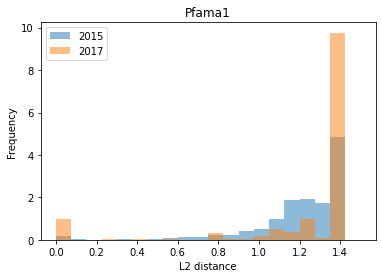

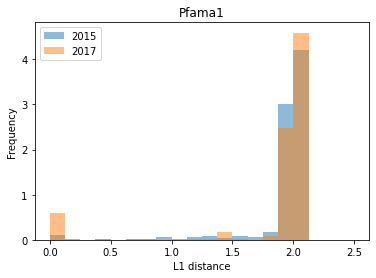

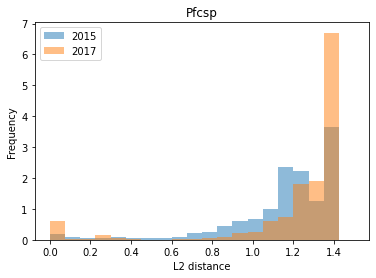

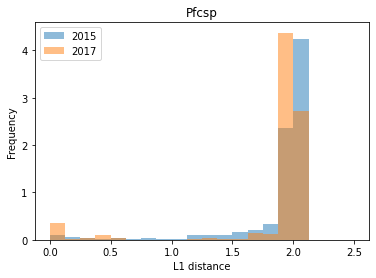

In [26]:
#Pfama1
hist_l2_ama_pre = plt.hist(mat_vals(dist_mat_pre_ama), 20, density = True, range = [0,1.5], label = '2015', alpha = .5)
hist_l2_ama_post = plt.hist(mat_vals(dist_mat_post_ama), 20, density = True, range = [0,1.5], label = '2017', alpha = .5)
#plt.hist(dist_mat_cross.flatten(), 20, range = [0,3], label = 'cross', alpha = .5)
plt.title('Pfama1')
plt.xlabel('L2 distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

hist_l1_ama_pre = plt.hist(mat_vals(l1_mat_pre_ama), 20, density = True, range = [0,2.5], label = '2015', alpha = .5)
hist_l1_ama_post = plt.hist(mat_vals(l1_mat_post_ama), 20, density = True, range = [0,2.5], label = '2017', alpha = .5)
#plt.hist(l1_mat_cross.flatten(), 20, range = [0,10], label = 'cross', alpha = .5)
plt.title('Pfama1')
plt.xlabel('L1 distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Pfcsp
hist_l2_csp_pre = plt.hist(mat_vals(dist_mat_pre_csp), 20, density = True, range = [0,1.5], label = '2015', alpha = .5)
hist_l2_csp_post = plt.hist(mat_vals(dist_mat_post_csp), 20, density = True, range = [0,1.5], label = '2017', alpha = .5)
#plt.hist(dist_mat_cross.flatten(), 20, range = [0,3], label = 'cross', alpha = .5)
plt.title('Pfcsp')
plt.xlabel('L2 distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

hist_l1_csp_pre = plt.hist(mat_vals(l1_mat_pre_csp), 20, density = True, range = [0,2.5], label = '2015', alpha = .5)
hist_l1_csp_post = plt.hist(mat_vals(l1_mat_post_csp), 20, density = True, range = [0,2.5], label = '2017', alpha = .5)
#plt.hist(l1_mat_cross.flatten(), 20, range = [0,10], label = 'cross', alpha = .5)
plt.title('Pfcsp')
plt.xlabel('L1 distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We see that, as expected, the mean distances in pre are larger than in post, since the correlation simulated for the post data is stronger. Also, the distances between post and pre (cross) are the largest since these distances are the least correlated and the largest (pre cases are located aroung the 25th genotype while post are around the 15th.)

Finally, here I show the distance matrices for pre, post and cross where we can see the distances for each of the pair comparisons. 

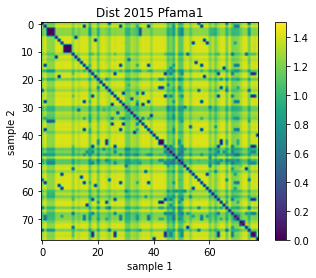

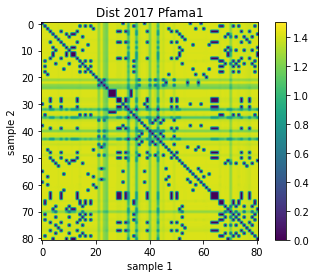

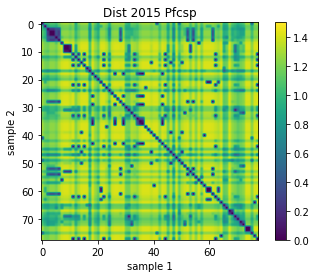

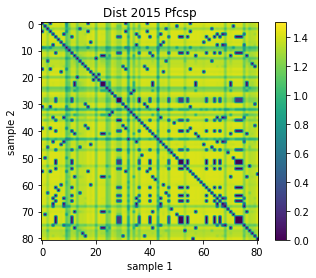

In [16]:
cmap = 'viridis'

plt.imshow(dist_mat_pre_ama, vmin = 0, vmax = 1.5, cmap = cmap)
plt.title('Dist 2015 Pfama1')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
plt.colorbar()
#plt.savefig(save_path + 'l2_mat_ama_2015.pdf')
plt.show()

plt.imshow(dist_mat_post_ama, vmin = 0, vmax = 1.5, cmap = cmap)
plt.title('Dist 2017 Pfama1')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
plt.colorbar()
#plt.savefig(save_path + 'l2_mat_ama_2017.pdf')
plt.show()

plt.imshow(dist_mat_pre_csp, vmin = 0, vmax = 1.5, cmap = cmap)
plt.title('Dist 2015 Pfcsp')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
plt.colorbar()
#plt.savefig(save_path + 'l2_mat_csp_2015.pdf')
plt.show()

plt.imshow(dist_mat_post_csp, vmin = 0, vmax = 1.5, cmap = cmap)
plt.title('Dist 2015 Pfcsp')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
plt.colorbar()
#plt.savefig(save_path + 'l2_mat_csp_2017.pdf')
plt.show()



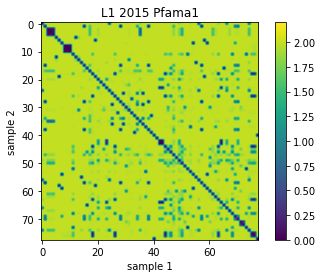

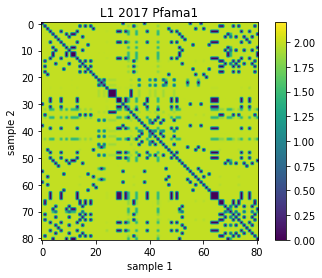

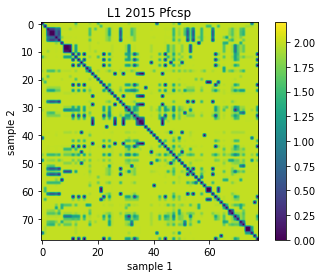

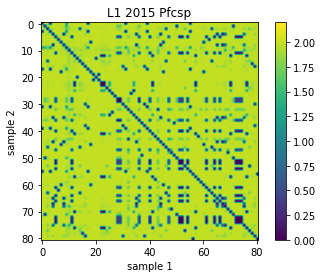

In [17]:
cmap = 'viridis'

plt.imshow(l1_mat_pre_ama, vmin = 0, vmax = 2.2, cmap = cmap)
plt.title('L1 2015 Pfama1')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
plt.colorbar()
#plt.savefig(save_path + 'l1_mat_ama_2015.pdf')
plt.show()

plt.imshow(l1_mat_post_ama, vmin = 0, vmax = 2.2, cmap = cmap)
plt.title('L1 2017 Pfama1')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
plt.colorbar()
#plt.savefig(save_path + 'l1_mat_ama_2017.pdf')
plt.show()

plt.imshow(l1_mat_pre_csp, vmin = 0, vmax = 2.2, cmap = cmap)
plt.title('L1 2015 Pfcsp')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
plt.colorbar()
#plt.savefig(save_path + 'l1_mat_csp_2017.pdf')
plt.show()

plt.imshow(l1_mat_post_csp, vmin = 0, vmax = 2.2, cmap = cmap)
plt.title('L1 2015 Pfcsp')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
plt.colorbar()
#plt.savefig(save_path + 'l1_mat_csp_2015.pdf')
plt.show()



In [235]:
#Pfama1
jacc_mat_pre_ama = relatedness_mat(genotypes_pre_ama,genotypes_pre_ama, method = 'jaccard')
jacc_mat_post_ama = relatedness_mat(genotypes_post_ama,genotypes_post_ama, method = 'jaccard')

bin_mat_pre_ama = relatedness_mat(genotypes_pre_ama,genotypes_pre_ama, method = 'bin_sharing')
bin_mat_post_ama = relatedness_mat(genotypes_post_ama,genotypes_post_ama, method = 'bin_sharing')

#Pfcsp
jacc_mat_pre_csp = relatedness_mat(genotypes_pre_csp,genotypes_pre_csp, method = 'jaccard')
jacc_mat_post_csp = relatedness_mat(genotypes_post_csp,genotypes_post_csp, method = 'jaccard')

bin_mat_pre_csp = relatedness_mat(genotypes_pre_csp,genotypes_pre_csp, method = 'bin_sharing')
bin_mat_post_csp = relatedness_mat(genotypes_post_csp,genotypes_post_csp, method = 'bin_sharing')


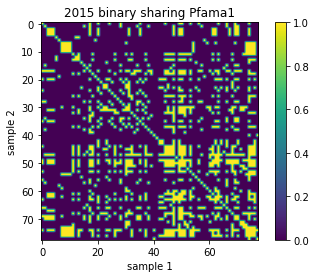

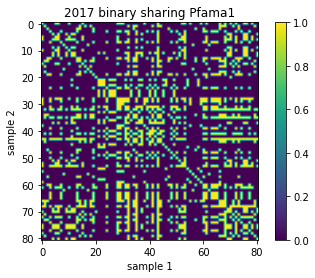

Mean 2015 binary sharing Pfama1: 0.2017982017982018 +/- 0.03444773281921764
Mean 2017 binary sharing Pfama1: 0.2410493827160494 +/- 0.031760175559113014
Difference in dist between 2015 and 2017: 0.0392511809178476+/-0.046854616079207004, p = 0.4021863962982838


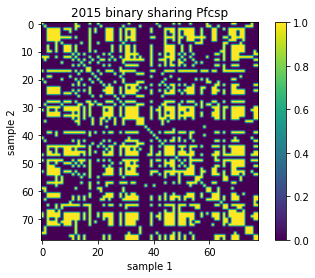

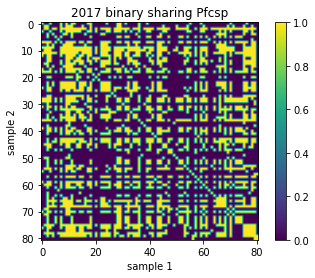

Mean 2015 binary sharing Pfcsp: 0.31601731601731603 +/- 0.04539185326651492
Mean 2017 binary sharing Pfcsp: 0.35987654320987655 +/- 0.048609182173335694
Difference in dist between 2015 and 2017: 0.043859227192560524+/-0.06650769079233887, p = 0.5095997925105953


In [236]:
plt.imshow(bin_mat_pre_ama, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2015 binary sharing Pfama1')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'bs_mat_ama_2015.pdf')
plt.show()

plt.imshow(bin_mat_post_ama, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2017 binary sharing Pfama1')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'bs_mat_ama_2017.pdf')
plt.show()

print_means(bin_mat_pre_ama, bin_mat_post_ama, 'binary sharing Pfama1')

plt.imshow(bin_mat_pre_csp, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2015 binary sharing Pfcsp')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'bs_mat_csp_2015.pdf')
plt.show()

plt.imshow(bin_mat_post_csp, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2017 binary sharing Pfcsp')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'bs_mat_csp_2017.pdf')
plt.show()

print_means(bin_mat_pre_csp, bin_mat_post_csp, 'binary sharing Pfcsp')

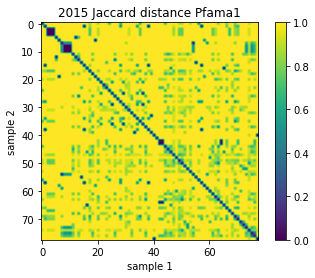

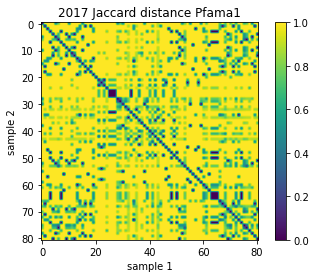

Mean 2015 Jaccard distance Pfama1: 0.948596681189089 +/- 0.0059816212737996925
Mean 2017 Jaccard distance Pfama1: 0.9006193326563696 +/- 0.008215973468443213
Difference in dist between 2015 and 2017: -0.0479773485327194+/-0.010162775855903536, p = 2.348147250086363e-06


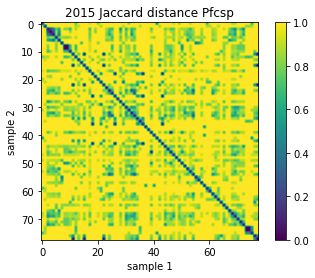

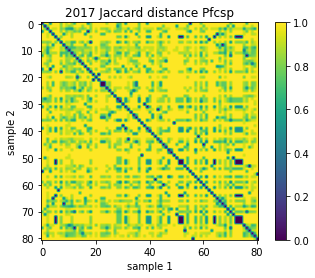

Mean 2015 Jaccard distance Pfcsp: 0.9250624573485536 +/- 0.009940423524148367
Mean 2017 Jaccard distance Pfcsp: 0.907946745232571 +/- 0.011518437655953399
Difference in dist between 2015 and 2017: -0.017115712115982618+/-0.015214677974690345, p = 0.2606113330877553


In [237]:
plt.imshow(jacc_mat_pre_ama, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2015 Jaccard distance Pfama1')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'jd_mat_ama_2015.pdf')
plt.show()

plt.imshow(jacc_mat_post_ama, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2017 Jaccard distance Pfama1')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'jd_mat_ama_2017.pdf')
plt.show()

print_means(jacc_mat_pre_ama, jacc_mat_post_ama, 'Jaccard distance Pfama1')

plt.imshow(jacc_mat_pre_csp, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2015 Jaccard distance Pfcsp')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'jd_mat_csp_2015.pdf')
plt.show()

plt.imshow(jacc_mat_post_csp, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2017 Jaccard distance Pfcsp')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'jd_mat_csp_2017.pdf')
plt.show()

print_means(jacc_mat_pre_csp, jacc_mat_post_csp, 'Jaccard distance Pfcsp')

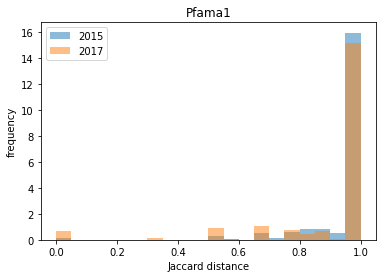

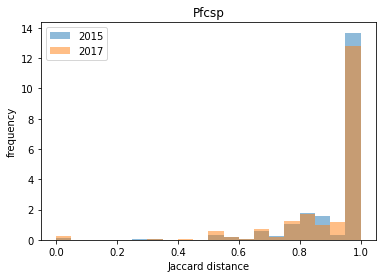

In [21]:
hist_jacc_ama_pre = plt.hist(mat_vals(jacc_mat_pre_ama), 20, density = True, range = [0,1], label = '2015', alpha = .5)
hist_jacc_ama_post = plt.hist(mat_vals(jacc_mat_post_ama), 20, density = True, range = [0,1], label = '2017', alpha = .5)
#plt.hist(dist_mat_cross.flatten(), 20, range = [0,3], label = 'cross', alpha = .5)
plt.xlabel('Jaccard distance')
plt.title('Pfama1')
plt.ylabel('frequency')
plt.legend()
plt.show()

hist_jacc_csp_pre = plt.hist(mat_vals(jacc_mat_pre_csp), 20, density = True, range = [0,1], label = '2015', alpha = .5)
hist_jacc_csp_post = plt.hist(mat_vals(jacc_mat_post_csp), 20, density = True, range = [0,1], label = '2017', alpha = .5)
#plt.hist(dist_mat_cross.flatten(), 20, range = [0,3], label = 'cross', alpha = .5)
plt.xlabel('Jaccard distance')
plt.title('Pfcsp')
plt.ylabel('frequency')
plt.legend()
plt.show()


In [20]:
#Pfama1
pcor_mat_pre_ama = relatedness_mat(genotypes_pre_ama,genotypes_pre_ama, method = 'pcorr')
pcor_mat_post_ama = relatedness_mat(genotypes_post_ama,genotypes_post_ama, method = 'pcorr')

#Pfcsp
pcor_mat_pre_csp = relatedness_mat(genotypes_pre_csp,genotypes_pre_csp, method = 'pcorr')
pcor_mat_post_csp = relatedness_mat(genotypes_post_csp,genotypes_post_csp, method = 'pcorr')


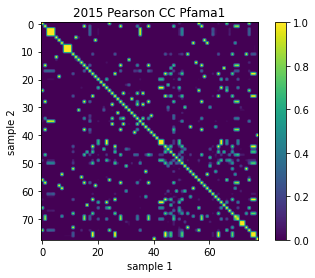

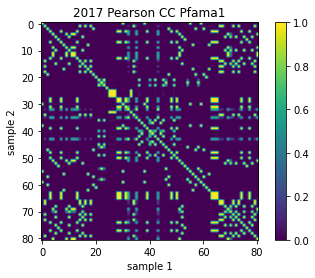

Mean 2015 Pearson CC Pfama1: 0.023144469324826084 +/- 0.008113718795732876
Mean 2017 Pearson CC Pfama1: 0.07393752270123076 +/- 0.013201890309715494
Difference in dist between 2015 and 2017: 0.050793053376404676+/-0.015495881402682094, p = 0.0010460386914764586


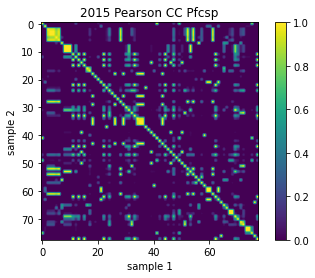

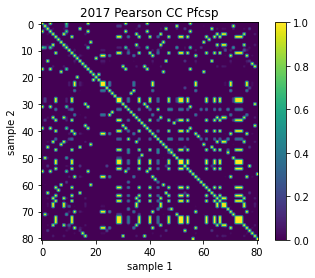

Mean 2015 Pearson CC Pfcsp: 0.05451954567033097 +/- 0.012600165827653782
Mean 2017 Pearson CC Pfcsp: 0.05998579589117675 +/- 0.015362193971371837
Difference in dist between 2015 and 2017: 0.005466250220845785+/-0.019868597899661347, p = 0.7832239859102138


In [239]:
#Pfama1
plt.imshow(pcor_mat_pre_ama, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2015 Pearson CC Pfama1')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'pcc_mat_ama_2015.pdf')
plt.show()

plt.imshow(pcor_mat_post_ama, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2017 Pearson CC Pfama1')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'pcc_mat_ama_2017.pdf')
plt.show()

print_means(pcor_mat_pre_ama, pcor_mat_post_ama, 'Pearson CC Pfama1')

#Pfcsp
plt.imshow(pcor_mat_pre_csp, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2015 Pearson CC Pfcsp')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'pcc_mat_csp_2015.pdf')
plt.show()

plt.imshow(pcor_mat_post_csp, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('2017 Pearson CC Pfcsp')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
#plt.savefig(save_path + 'pcc_mat_csp_2017.pdf')
plt.show()


print_means(pcor_mat_pre_csp, pcor_mat_post_csp, 'Pearson CC Pfcsp')

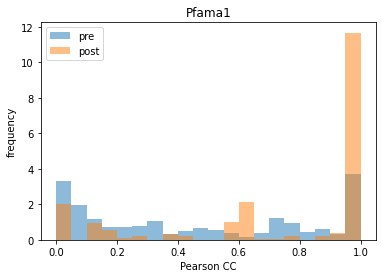

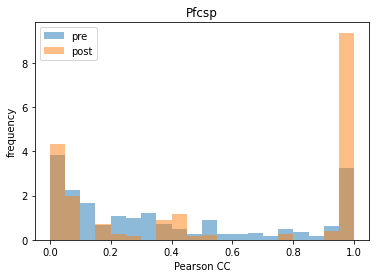

In [24]:
hist_pcor_ama_pre = plt.hist(mat_vals(pcor_mat_pre_ama), 20, density = True, range = [0,1], label = 'pre', alpha = .5)
hist_pcor_ama_post = plt.hist(mat_vals(pcor_mat_post_ama), 20, density = True, range = [0,1], label = 'post', alpha = .5)
plt.xlabel('Pearson CC')
plt.title('Pfama1')
plt.ylabel('frequency')
plt.legend()
plt.show()

hist_pcor_csp_pre = plt.hist(mat_vals(pcor_mat_pre_csp), 20, density = True, range = [0,1], label = 'pre', alpha = .5)
hist_pcor_csp_post = plt.hist(mat_vals(pcor_mat_post_csp), 20, density = True, range = [0,1], label = 'post', alpha = .5)
plt.xlabel('Pearson CC')
plt.title('Pfcsp')
plt.ylabel('frequency')
plt.legend()
plt.show()


In [165]:
data_hist = {
    'bins_L1_ama_pre': hist_l1_ama_pre[0],
    'bins_L1_ama_post': hist_l1_ama_post[0],
    'bins_L1_csp_pre': hist_l1_csp_pre[0],
    'bins_L1_csp_post': hist_l1_csp_post[0],
    'bins_L2_ama_pre': hist_l2_ama_pre[0],
    'bins_L2_ama_post': hist_l2_ama_post[0],
    'bins_L2_csp_pre': hist_l2_csp_pre[0],
    'bins_L2_csp_post': hist_l2_csp_post[0],
    'bins_JD_ama_pre': hist_jacc_ama_pre[0],
    'bins_JD_ama_post': hist_jacc_ama_post[0],
    'bins_JD_csp_pre': hist_jacc_csp_pre[0],
    'bins_JD_csp_post': hist_jacc_csp_post[0],
    'bins_pcor_ama_pre': hist_pcor_ama_pre[0],
    'bins_pcor_ama_post': hist_pcor_ama_post[0],
    'bins_pcor_csp_pre': hist_pcor_csp_pre[0],
    'bins_pcor_csp_post': hist_pcor_csp_post[0],
}
data_bins = {
    'hist_L1_ama_pre': hist_l1_ama_pre[1],
    'hist_L1_ama_post': hist_l1_ama_post[1],
    'hist_L1_csp_pre': hist_l1_csp_pre[1],
    'hist_L1_csp_post': hist_l1_csp_post[1],
    'hist_L2_ama_pre': hist_l2_ama_pre[1],
    'hist_L2_ama_post': hist_l2_ama_post[1],
    'hist_L2_csp_pre': hist_l2_csp_pre[1],
    'hist_L2_csp_post': hist_l2_csp_post[1],
    'hist_JD_ama_pre': hist_jacc_ama_pre[1],
    'hist_JD_ama_post': hist_jacc_ama_post[1],
    'hist_JD_csp_pre': hist_jacc_csp_pre[1],
    'hist_JD_csp_post': hist_jacc_csp_post[1],
    'hist_pcor_ama_pre': hist_pcor_ama_pre[1],
    'hist_pcor_ama_post': hist_pcor_ama_post[1],
    'hist_pcor_csp_pre': hist_pcor_csp_pre[1],
    'hist_pcor_csp_post': hist_pcor_csp_post[1],
}

In [166]:
df_bins = pd.DataFrame(data=data_bins)
df_hist = pd.DataFrame(data=data_hist)

In [167]:
df_bins.to_csv('/Users/arnau/Documents/isglobal/genomics/notes/genomics/haplotypes_magude_2015_2017/histogram_bins.csv')
df_hist.to_csv('/Users/arnau/Documents/isglobal/genomics/notes/genomics/haplotypes_magude_2015_2017/histogram_data.csv')

# Fraction of extremely similar pairs 

### TODO:

- for all metrics, error bars and power in change

In [30]:
def get_percent(mat, p, mask = None, diag = True):
    """This method returns the percentile value for all
    the values within a matrix.
    
    Parameters:
    -----------
    mat: np.ndarray
        Matrix of values.
    p: float
        It defines the percentile to obtain 
    mask: np.array
        Mask selecting the elements in mat used.
    diag: bool
        It specifies whether the matrix is diagonally
        symmetric and repeated cases are excluded

    Returns:
    --------
    val: float
        value corresponding to the percentile
    """
    return np.percentile(mat_vals(mat, mask = mask, diag = diag), p)

def percentile_change(mat_pre, mat_post, p, mask = None, diag = True, inverse = False):
    """
    This method measures the change in proportion of populaiton
    within a precentile defined on the first population. 
    
    Parameters:
    -----------
    mat_pre: np.ndarray
        Matrix of values of the first population
    mat_post: np.ndarray
        Matrix of values of the second population
    p: float
        It defines the percentile to obtain from the first population.
    mask: np.array
        Mask selecting the elements in mat used
    diag: bool
        It specifies whether the matrix is diagonally
        symmetric and repeated cases are excluded
    inverse: bool
        If True, the fractions are obtained from values below the percentile.

    Returns:
    --------
    pval: float
        Value corresponding to the percentile in mat_pre
    frac_pre: float
        Fraction of values > pval on mat_pre
    frac_post: float
        Fraction of values > pval on mat_post
    """
    pval = get_percent(mat_pre, p)
    print("Value corresponding to the "+str(p)+" percentile on the first population: " +str(pval))
    #fraction of values higher than pval for first population
    if inverse:
        frac_pre = np.sum(mat_vals(mat_pre) < pval)/float(mat_vals(mat_pre).shape[0])
    else:
        frac_pre = np.sum(mat_vals(mat_pre) > pval)/float(mat_vals(mat_pre).shape[0])
    print("Fraction of values inside this range for the first population: " + str(frac_pre))
    #fraction of values higher than pval for second population
    if inverse:
        frac_post = np.sum(mat_vals(mat_post) < pval)/float(mat_vals(mat_post).shape[0])
    else:
        frac_post = np.sum(mat_vals(mat_post) > pval)/float(mat_vals(mat_post).shape[0])
    print("Fraction of values inside this range for the second population: " + str(frac_post))
    return pval, frac_pre, frac_post

In [57]:
from genomic_tools.stats import get_jk_indeces_1d, jack_knife
def get_frac(data, pval, lower_than = False):
    """This method estimates the fraction of cases above a certain value.
    
    Parameters:
    -----------
    data: np.array
        The data values
    pval: float
        Value defining the threshold
    lower_than: bool
        If true, the fraction is calculated for cases lower 
        than pval instead of higher
        
    Returns:
    --------
    frac: float
        Fraction of population inside the threshold
    """
    if lower_than:
        frac = np.sum(data < pval)/float(data.shape[0])
    else:
        frac = np.sum(data > pval)/float(data.shape[0])
    return frac

def get_frac_err(mat, pval, lower_than = False, jk_num = 20, rand_order = True, mask = None, diag = True):
    """This method estimates the fraction of cases above a certain value and its error.
    
    Parameters:
    -----------
    mat: np.ndarray
        Matrix with pairwise values
    pval: float
        Value defining the threshold
    lower_than: bool
        If true, the fraction is calculated for cases lower 
        than pval instead of higher
    jk_num: int
        Number of Jack-Knife subsamples used to obtain the error
    rand_order: bool
        It specifies whether the Jack-knife subsamples are randomly 
        ordered from the data
    mask: np.ndarray
        Mask specifying the elements used from mat
    diag: bool
        It specifies whether the matrix is diagonally
        symmetric and repeated cases are excluded
    
    Returns:
    --------
    frac: float
        Fraction of population inside the threshold
    err: float
        Error on the estimation of the fraction
    """
    frac = get_frac(mat_vals(mat, mask = mask, diag = diag), pval, lower_than = lower_than)
    jk_ids = get_jk_indeces_1d(mat[0], jk_num, rand_order)#TODO fix for diag = False
    frac_jk = np.array([get_frac(mat_vals(mat, jk_ids != i, diag = diag), pval, lower_than = lower_than) for i in range(jk_num)])
    err = jack_knife(np.array([frac]), frac_jk)
    return frac, err

In [69]:
s = 100
xtest = np.random.rand(s**2)
xtest = xtest.reshape(s,s)
get_frac_err(xtest, .5, jk_num=50)

(0.4919191919191919, 0.009166331625111325)

In [82]:
def get_diff_err_pow(mean_1, err_1, mean_2, err_2, verbose = True):
    """This method calculates the difference between two 
    measurements, the errors and the power of the change.
    
    Parameters:
    -----------
    mean_1: float
        First measurement
    err_1: float
        Error on the first measurement
    mean_2: float
        Second measurement
    err_2: float
        Error on the second measurement
    verbose: bool
        If True, it prints the results (default True)
        
    Returns:
    diff_means: float
        Difference between the measurements
    diff_err: float
        Error on the difference from error propagation
    power: float
        Power of the difference being different than zero.
    """
    diff_means = mean_2 - mean_1
    diff_err = np.sqrt(err_1**2 + err_2**2)
    power = 1 - sig2pow(np.abs(diff_means)/diff_err)
    if verbose:
        print ("Difference in measurements: " + str(round(diff_means, 4)) + "+/-" + str(round(diff_err, 4)) + ', p = ' + str(round(power, 4)))
    return diff_means, diff_err, power

In [75]:
print("pfama1")
mat_pre = pcor_mat_pre_ama
mat_post = pcor_mat_post_ama
for pval in [0.9,0.95,0.98, .99, .9999]:
    print("Relatedness threshold: " + str(pval))
    frac_pre, err_pre = get_frac_err(mat_pre, pval, jk_num=len(mat_pre))
    frac_post, err_post = get_frac_err(mat_post, pval, jk_num=len(mat_post))
    print("Fraction of values inside this range for the first population: " + str(frac_pre) + ' +/- ' + str(err_pre))
    print("Fraction of values inside this range for the second population: " + str(frac_post) + ' +/- ' + str(err_post))
    get_diff_err_pow(frac_pre, err_pre, frac_post, err_post)
    print("")
    
print("pfcsp")
mat_pre = pcor_mat_pre_csp
mat_post = pcor_mat_post_csp
for pval in [0.9,0.95,0.98, .99, .9999]:
    print("Relatedness threshold: " + str(pval))
    frac_pre, err_pre = get_frac_err(mat_pre, pval, jk_num=len(mat_pre))
    frac_post, err_post = get_frac_err(mat_post, pval, jk_num=len(mat_post))
    print("Fraction of values inside this range for the first population: " + str(frac_pre) + ' +/- ' + str(err_pre))
    print("Fraction of values inside this range for the second population: " + str(frac_post) + ' +/- ' + str(err_post))
    get_diff_err_pow(frac_pre, err_pre, frac_post, err_post)
    print("")

pfama1
Relatedness threshold: 0.9
Fraction of values inside this range for the first population: 0.021645021645021644 +/- 0.004572593155554717
Fraction of values inside this range for the second population: 0.07777777777777778 +/- 0.01118121345392507
Difference in measurements: 0.05613275613275613+/-0.012080072121823647, p = 3.3724856234318423e-06

Relatedness threshold: 0.95
Fraction of values inside this range for the first population: 0.01998001998001998 +/- 0.004573239686933787
Fraction of values inside this range for the second population: 0.07530864197530865 +/- 0.01123394606879053
Difference in measurements: 0.055328621995288665+/-0.012129141169540425, p = 5.0758676826134774e-06

Relatedness threshold: 0.98
Fraction of values inside this range for the first population: 0.018315018315018316 +/- 0.0046666721708849244
Fraction of values inside this range for the second population: 0.07407407407407407 +/- 0.01142429058545517
Difference in measurements: 0.05575905575905575+/-0.012340

In [26]:
print("Distance L2 pfama1")
percentile_change(dist_mat_pre_ama, dist_mat_post_ama, 1, inverse = True)
print("Distance L2 pfcsp")
percentile_change(dist_mat_pre_csp, dist_mat_post_csp, 1, inverse = True)

print("")
print("Distance L1 pfama1")
percentile_change(l1_mat_pre_ama, l1_mat_post_ama, 1, inverse = True)
print("Distance L1 pfcsp")
percentile_change(l1_mat_pre_csp, l1_mat_post_csp, 1, inverse = True)

print("")
print("Jaccard distance pfama1")
percentile_change(jacc_mat_pre_ama, jacc_mat_post_ama, 1, inverse = True)
print("Jaccard distance pfcsp")
percentile_change(jacc_mat_pre_csp, jacc_mat_post_csp, 1, inverse = True)

print("")
print("Pearson CC pfama1")
percentile_change(pcor_mat_pre_ama, pcor_mat_post_ama, 99)
print("Pearson CC pfcsp")
percentile_change(pcor_mat_pre_csp, pcor_mat_post_csp, 99)

Distance L2 pfama1
Value corresponding to the 1 percentile on the first population: 0.016399713702063338
Fraction of values inside this range for the second population: 0.010323010323010324
Fraction of values inside this range for the second population: 0.04969135802469136
Distance L2 pfcsp
Value corresponding to the 1 percentile on the first population: 0.018751026761601876
Fraction of values inside this range for the second population: 0.010323010323010324
Fraction of values inside this range for the second population: 0.033950617283950615

Distance L1 pfama1
Value corresponding to the 1 percentile on the first population: 0.023253517721301024
Fraction of values inside this range for the second population: 0.010323010323010324
Fraction of values inside this range for the second population: 0.04969135802469136
Distance L1 pfcsp
Value corresponding to the 1 percentile on the first population: 0.030991576573386963
Fraction of values inside this range for the second population: 0.0103230

(0.9998997098567549, 0.010323010323010324, 0.033950617283950615)

# Correlations between relatedness and other properties from data 

### TODO:

- Get mean relatedness for different populations in 
    - gender
    - area
    - fevertemp
    - antimal
    - age_cat
    - den_cat
    - area2


In [72]:
#Setting transposed haplotype data with the right index dtype 
data_amaT = data_ama.T
data_amaT.index = data_amaT.index.astype(str)
data_cspT = data_csp.T
data_cspT.index = data_cspT.index.astype(str)

#Merge haplotype data with other data
merged_ama = pd.merge(data_amaT, data, left_index = True, right_index = True)
merged_csp = pd.merge(data_cspT, data, left_index = True, right_index = True)

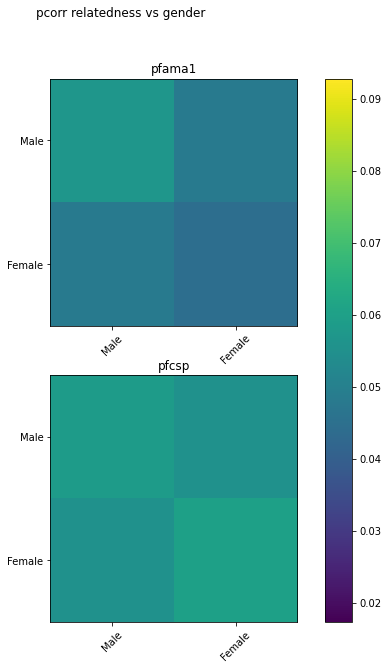

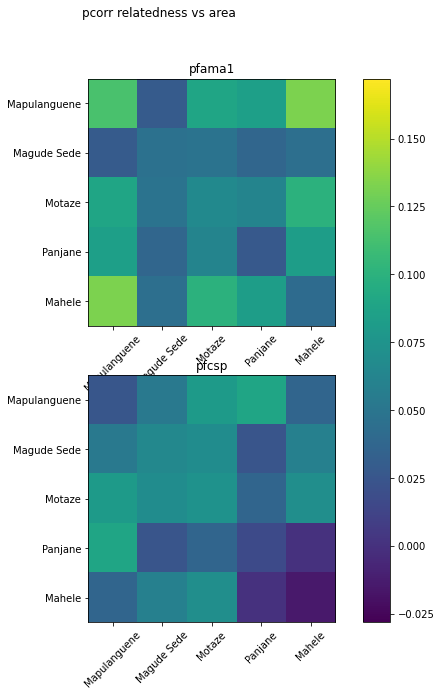

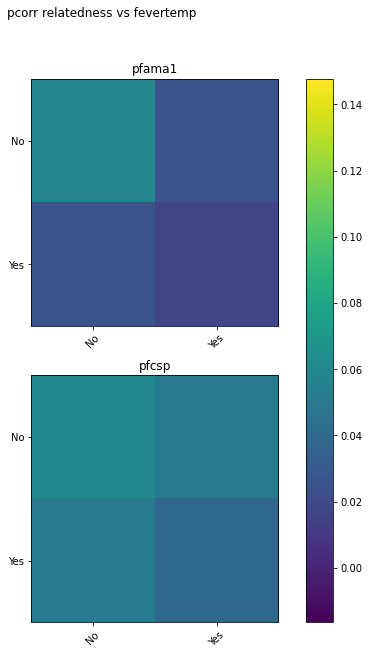

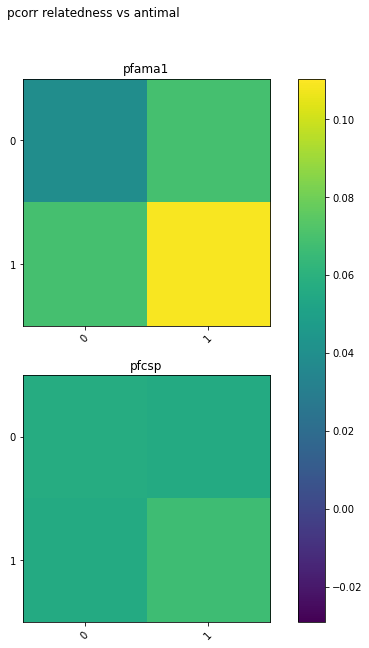

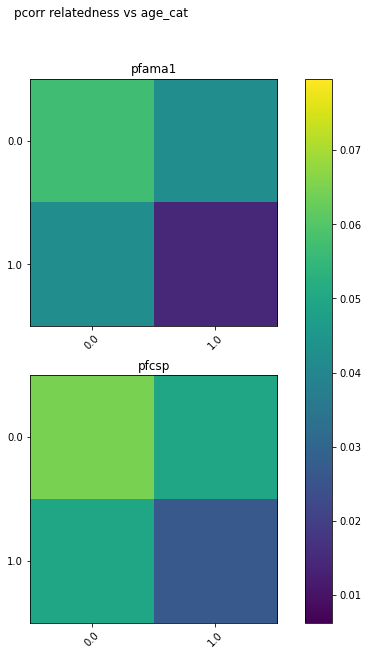

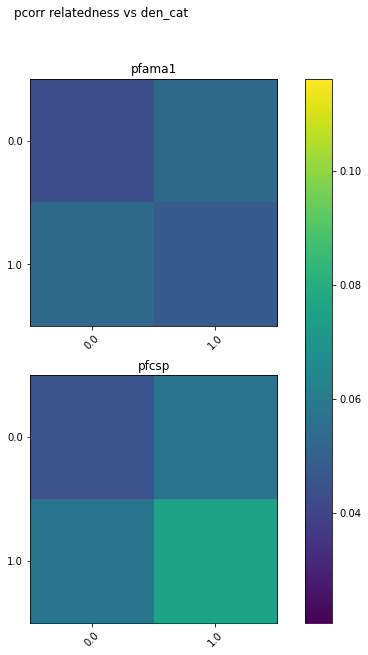

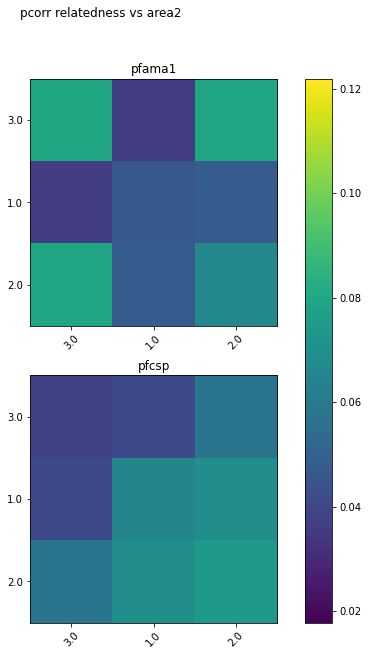

In [73]:
#Get haplotype frequencies from a selection
for category in ['gender', 'area', 'fevertemp', 'antimal', 'age_cat', 'den_cat', 'area2']: 
    types = data[category].unique()
    #list of all haplotype frequencies selected for each type
    haplotype_freqs_ama_pre = []
    haplotype_freqs_ama_post = []
    haplotype_freqs_csp_pre = []
    haplotype_freqs_csp_post = []
    for tt in types:
        hap_freq = np.array([merged_ama.loc[str(col)][:n_ama_haplotypes] for col in cols_pre if merged_ama.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_ama_pre.append(hap_freq)
        hap_freq = np.array([merged_ama.loc[str(col)][:n_ama_haplotypes] for col in cols_post if merged_ama.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_ama_post.append(hap_freq)
        hap_freq = np.array([merged_csp.loc[str(col)][:n_csp_haplotypes] for col in cols_pre if merged_csp.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_csp_pre.append(hap_freq)
        hap_freq = np.array([merged_csp.loc[str(col)][:n_csp_haplotypes] for col in cols_post if merged_csp.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_csp_post.append(hap_freq)
    
    #Get relatedness matrices for all metrics
    for mm in ['pcorr']:
        relat_cross_ama_pre = np.zeros((len(types), len(types)))
        relat_cross_ama_post = np.zeros((len(types), len(types)))
        relat_cross_ama_mean = np.zeros((len(types), len(types)))
        relat_cross_csp_pre = np.zeros((len(types), len(types)))
        relat_cross_csp_post = np.zeros((len(types), len(types)))
        relat_cross_csp_mean = np.zeros((len(types), len(types)))
        for ii, tt in enumerate(types):
            for jj, tt in enumerate(types):
                if jj == ii:
                    diag = True
                else:
                    diag = False
                #pfama1
                mat_ama_pre = relatedness_mat(haplotype_freqs_ama_pre[ii], haplotype_freqs_ama_pre[jj], method = mm)
                mat_ama_post = relatedness_mat(haplotype_freqs_ama_post[ii], haplotype_freqs_ama_post[jj], method = mm)
                relat_cross_ama_pre[ii,jj] = np.mean(mat_vals(mat_ama_pre, diag = diag))
                relat_cross_ama_post[ii,jj] = np.mean(mat_vals(mat_ama_post, diag = diag))
                relat_cross_ama_mean[ii,jj] = np.mean(np.concatenate((mat_vals(mat_ama_pre, diag = diag), mat_vals(mat_ama_post, diag = diag)))) 
                #pfcsp
                mat_csp_pre = relatedness_mat(haplotype_freqs_csp_pre[ii], haplotype_freqs_csp_pre[jj], method = mm)
                mat_csp_post = relatedness_mat(haplotype_freqs_csp_post[ii], haplotype_freqs_csp_post[jj], method = mm)
                relat_cross_csp_pre[ii,jj] = np.mean(mat_vals(mat_csp_pre, diag = diag))
                relat_cross_csp_post[ii,jj] = np.mean(mat_vals(mat_csp_post, diag = diag))
                relat_cross_csp_mean[ii,jj] = np.mean(np.concatenate((mat_vals(mat_csp_pre, diag = diag), mat_vals(mat_csp_post, diag = diag))))
                
        #Plot mean statistics between all them
        all_vals = np.concatenate((relat_cross_ama_pre, relat_cross_ama_post,relat_cross_csp_pre, relat_cross_csp_post))
        min_v = np.min(all_vals)
        max_v = np.max(all_vals)
        
        fig, axs = plt.subplots(2, 1)
        fig.set_size_inches([10,10])
        fig.suptitle(mm + ' relatedness vs ' + category)
            
        images = []
            
        images.append(axs[0].imshow(relat_cross_ama_mean, vmin = min_v, vmax = max_v))
        axs[0].set_title('pfama1')
        axs[0].set_xticks(np.arange(len(types)))
        axs[0].set_xticklabels(types, rotation=45)
        axs[0].set_yticks(np.arange(len(types)))
        axs[0].set_yticklabels(types)
                                
        images.append(axs[1].imshow(relat_cross_csp_mean, vmin = min_v, vmax = max_v))
        axs[1].set_title('pfcsp')
        axs[1].set_xticks(np.arange(len(types)))
        axs[1].set_xticklabels(types, rotation=45)
        axs[1].set_yticks(np.arange(len(types)))
        axs[1].set_yticklabels(types)
                        
        fig.colorbar(images[0], ax = axs)
        plt.savefig(save_path + mm + '_' + category + '.pdf')
        plt.show()


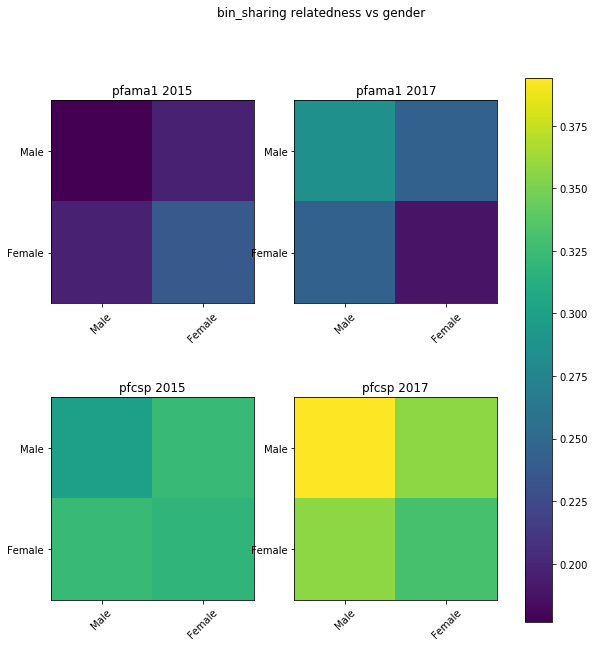

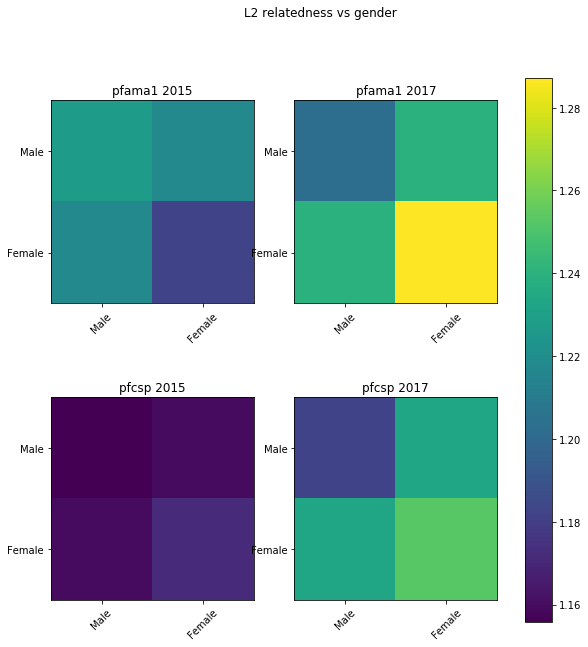

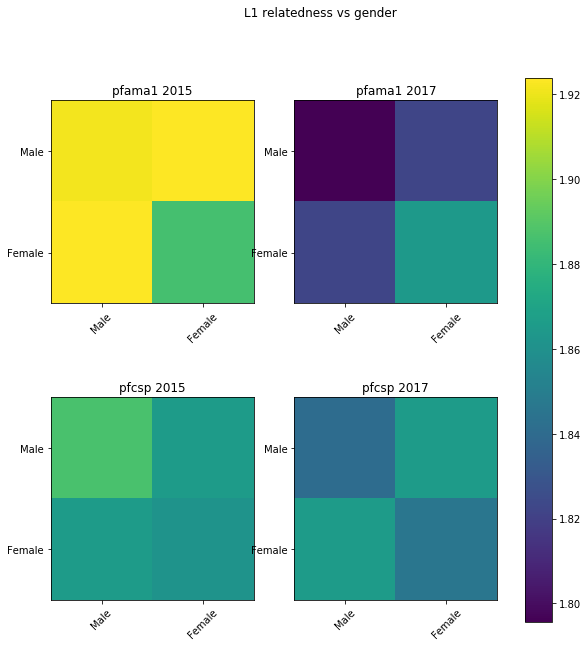

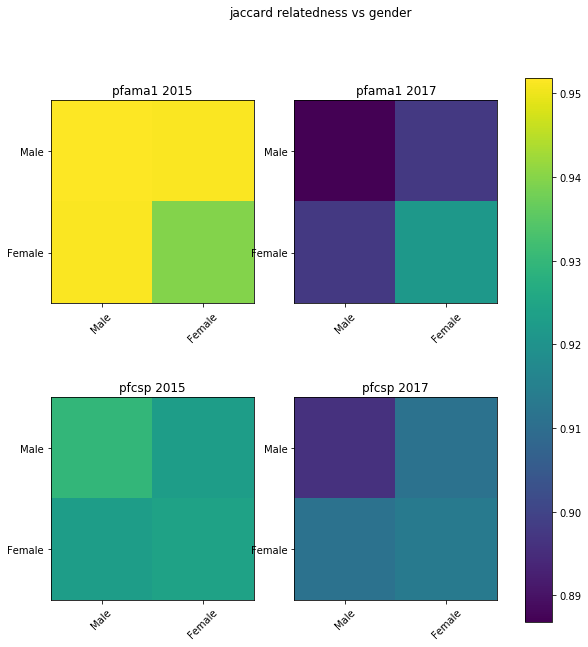

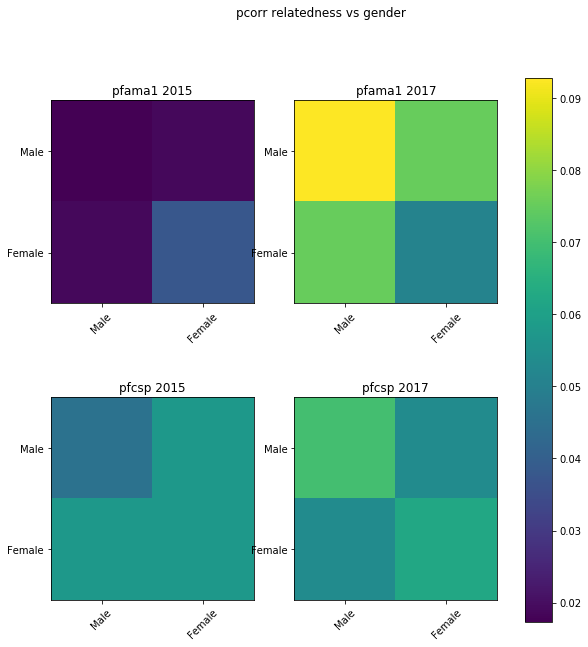

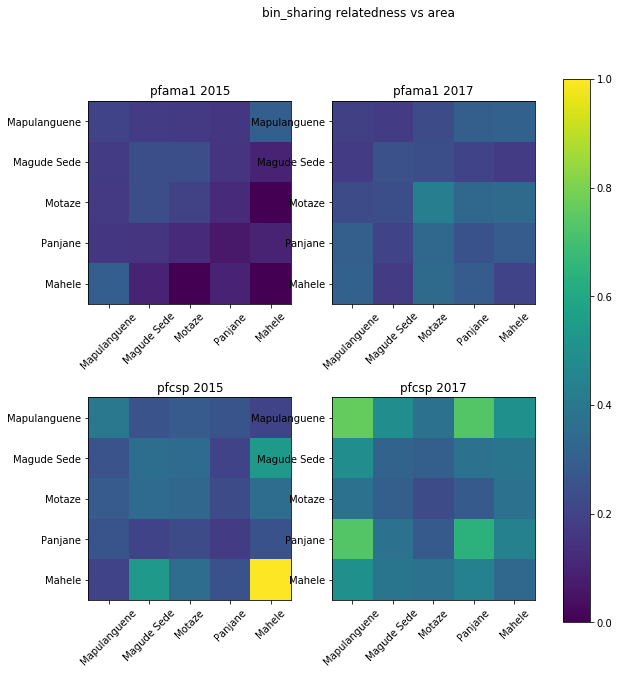

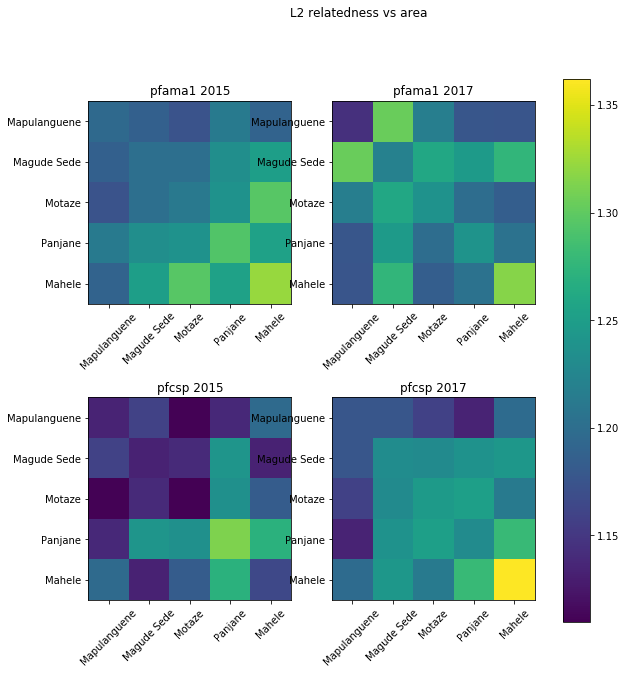

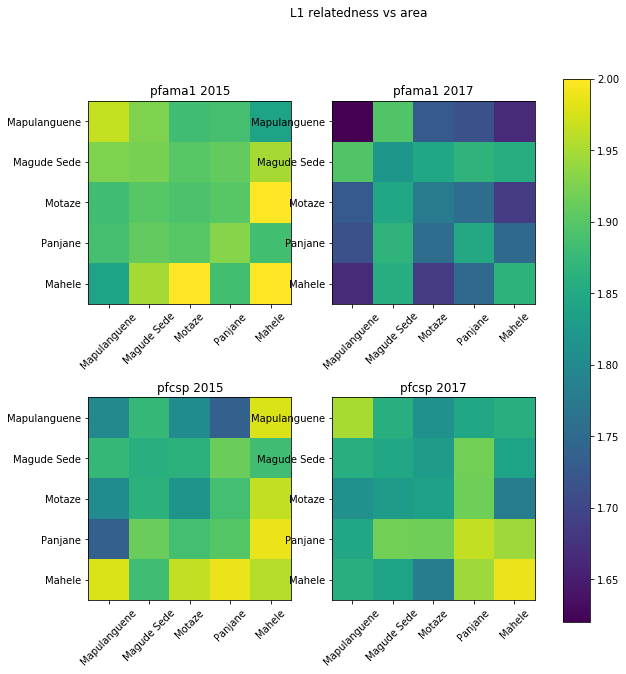

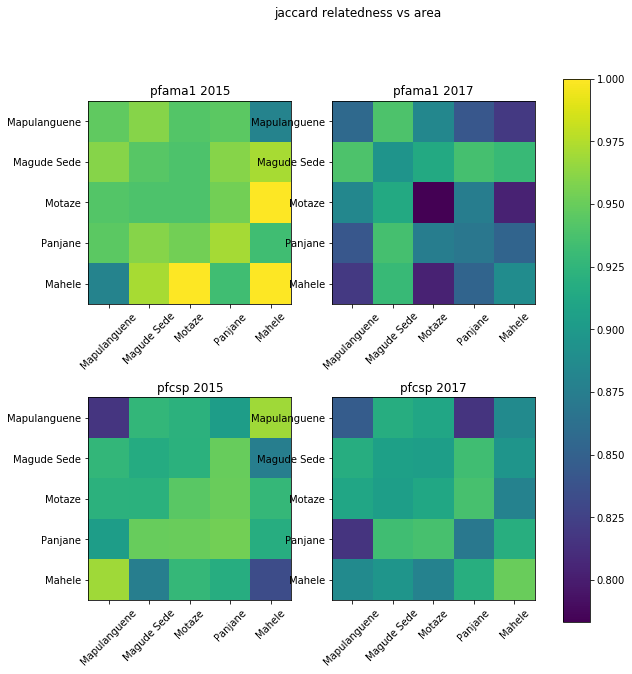

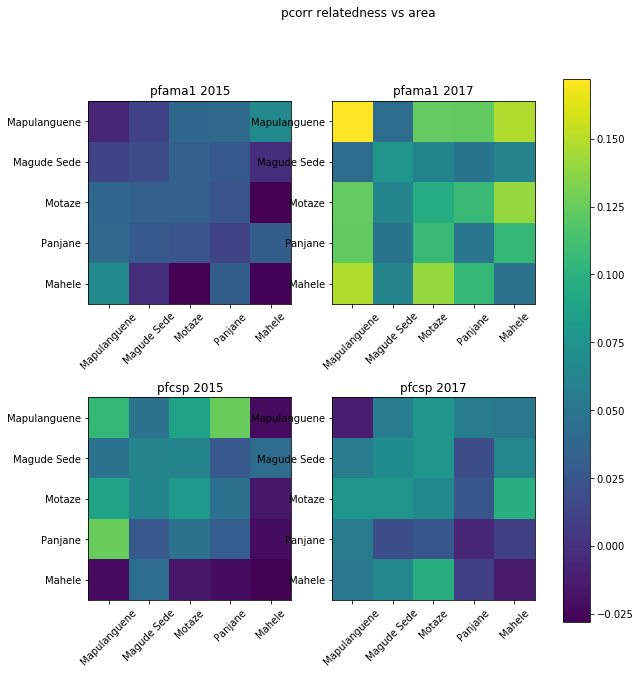

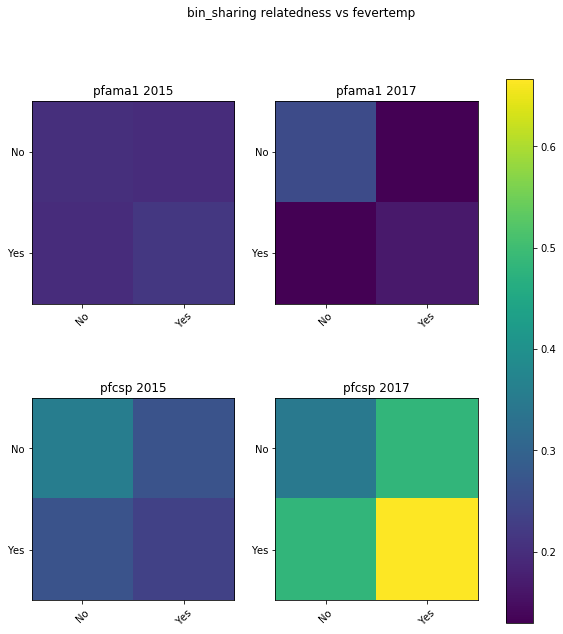

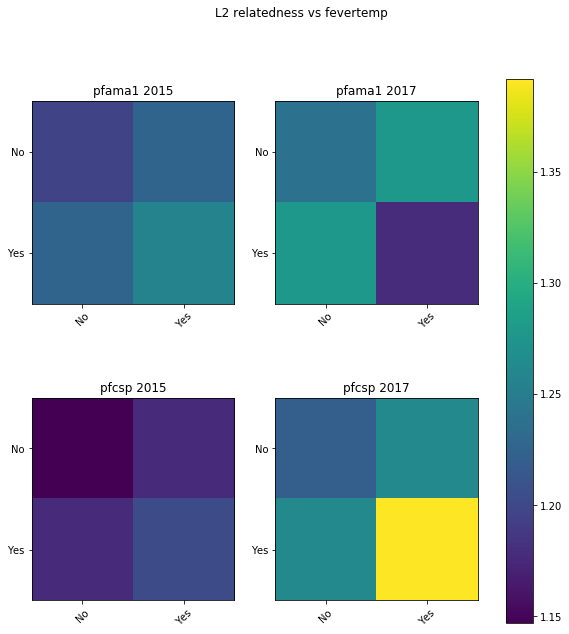

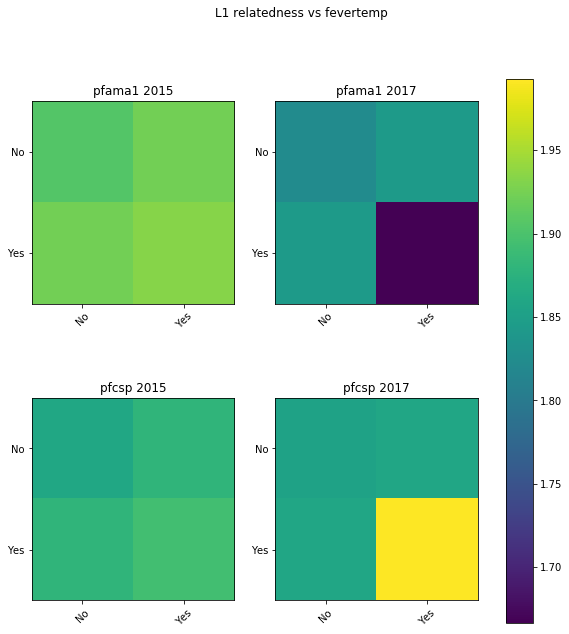

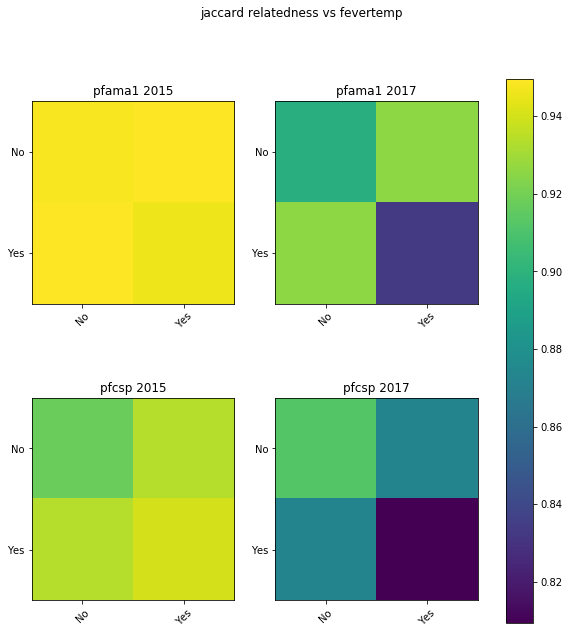

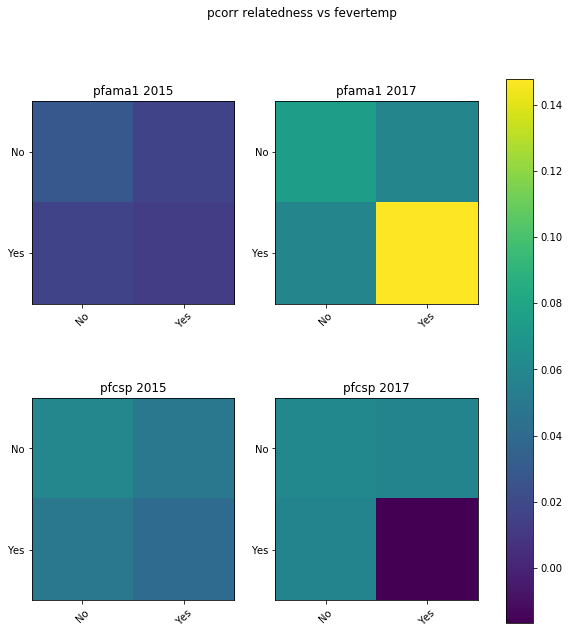

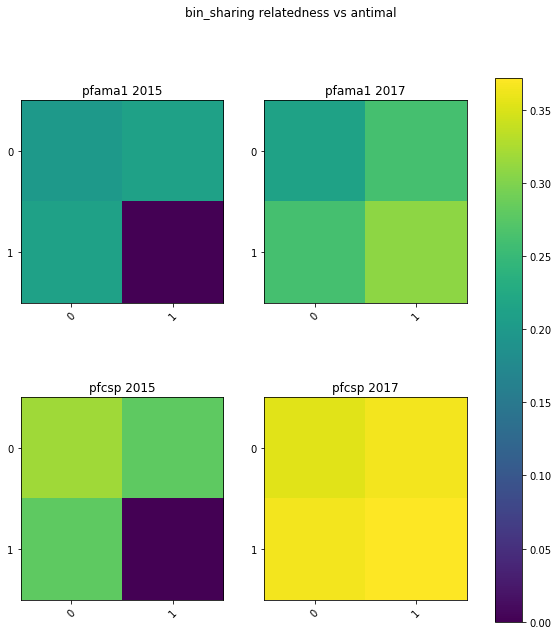

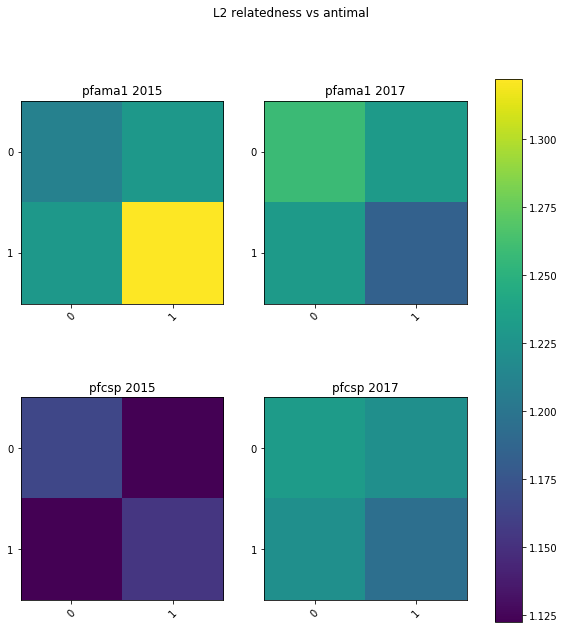

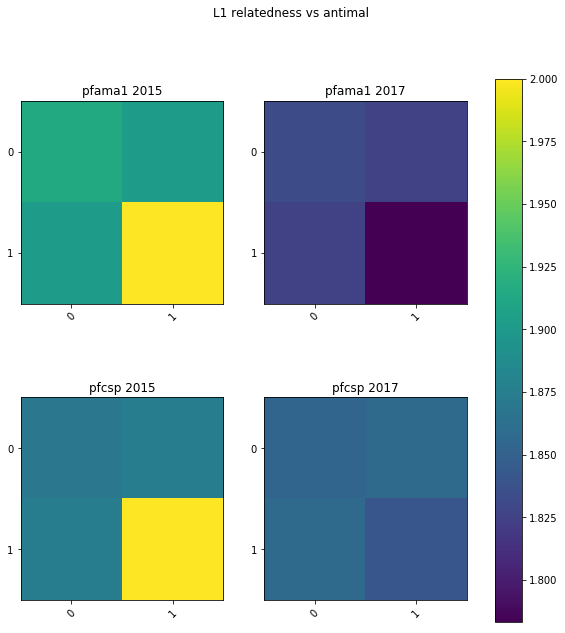

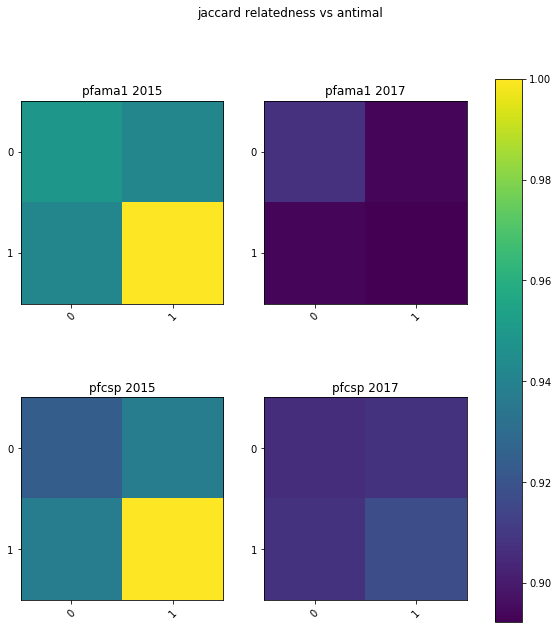

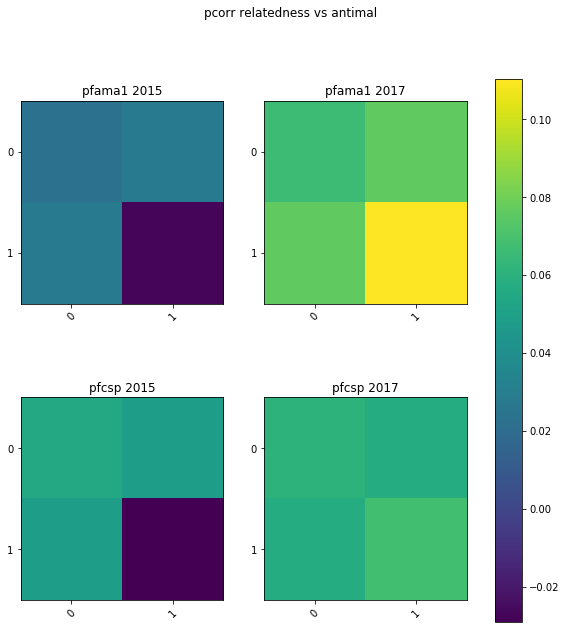

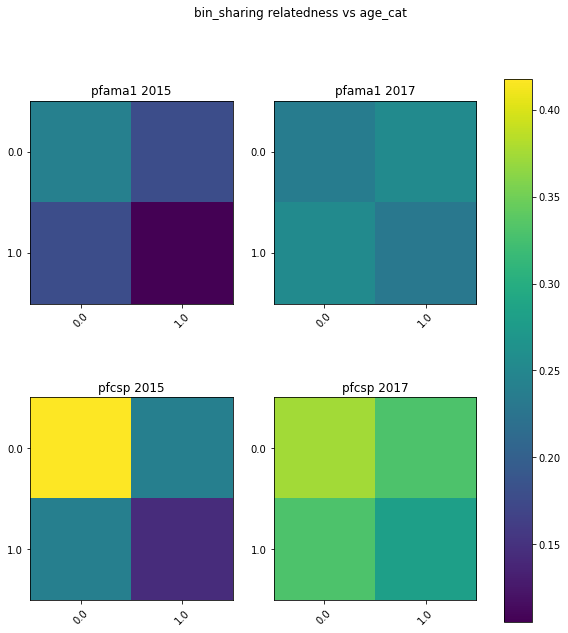

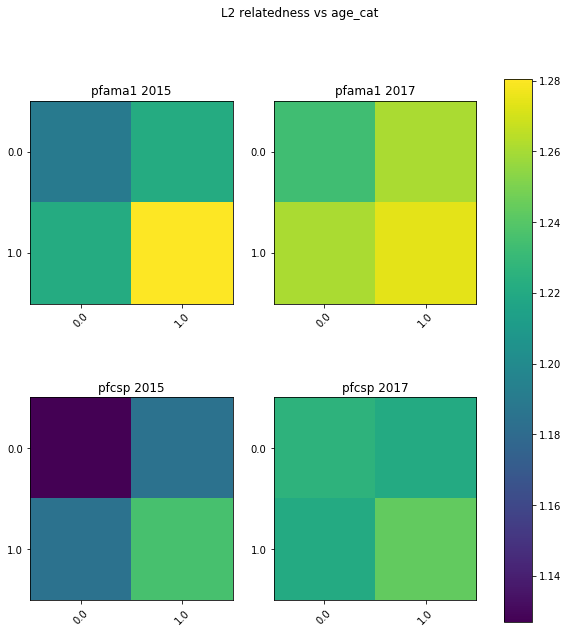

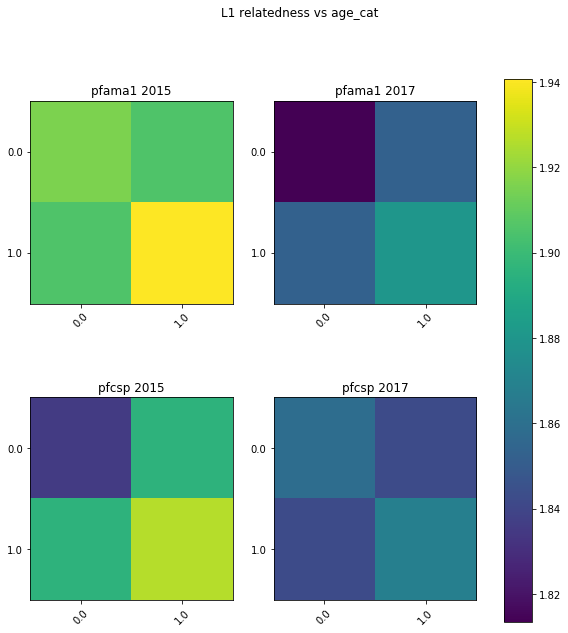

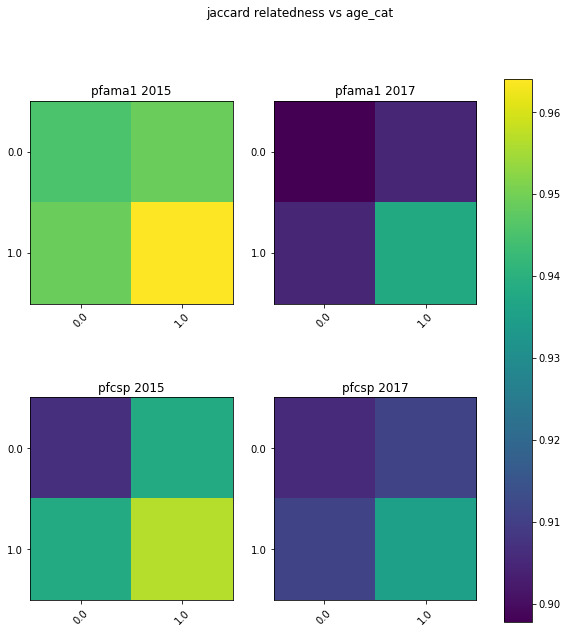

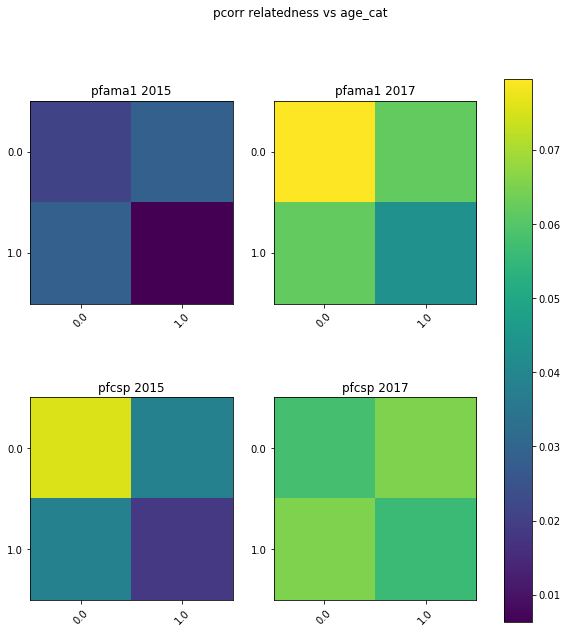

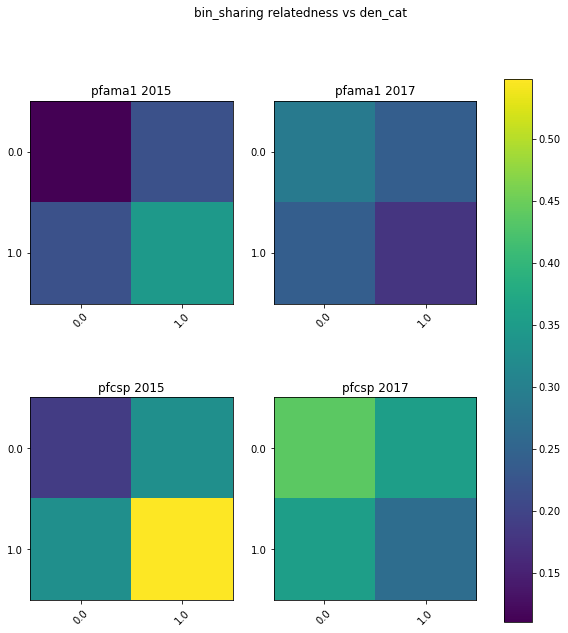

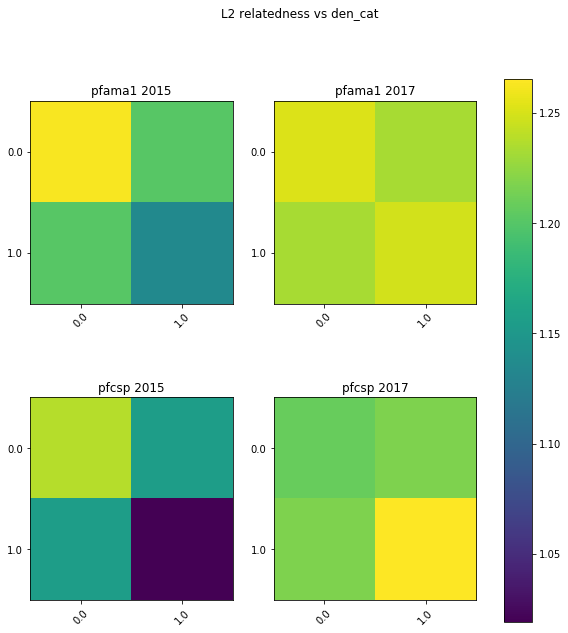

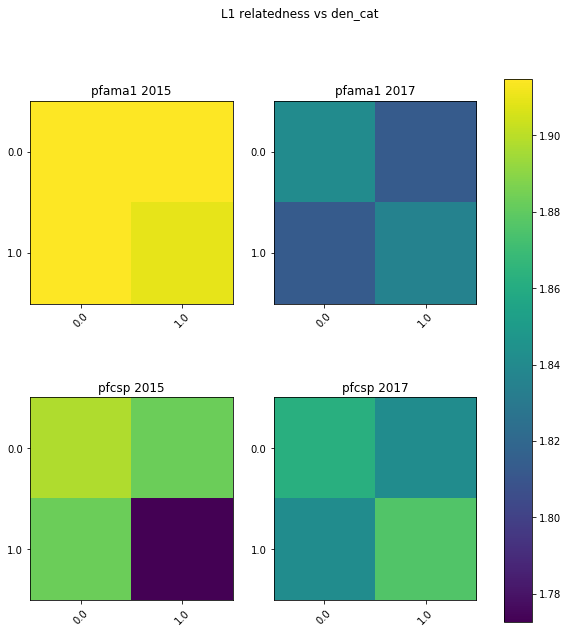

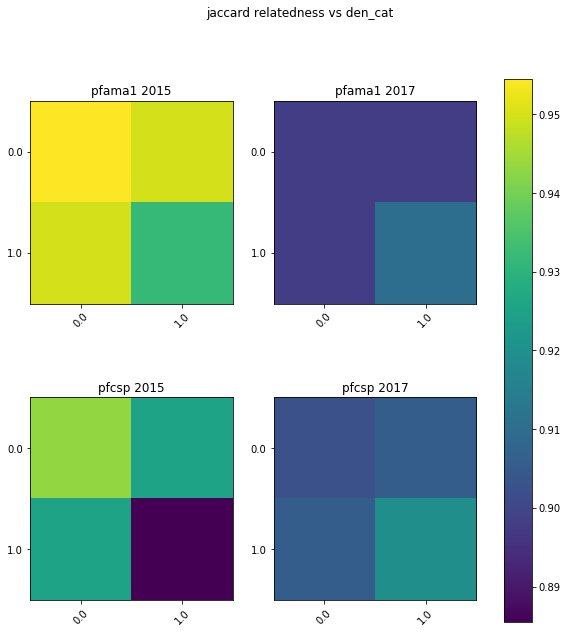

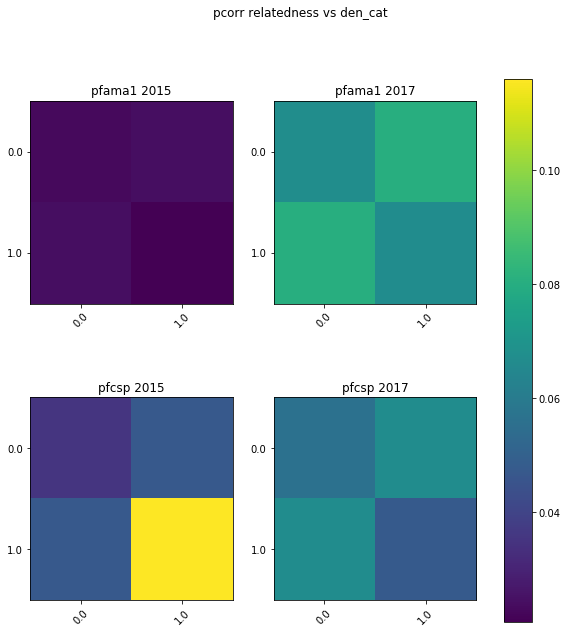

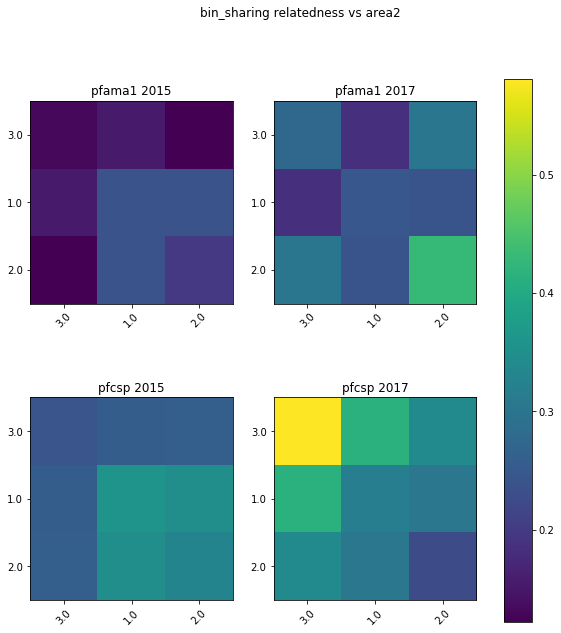

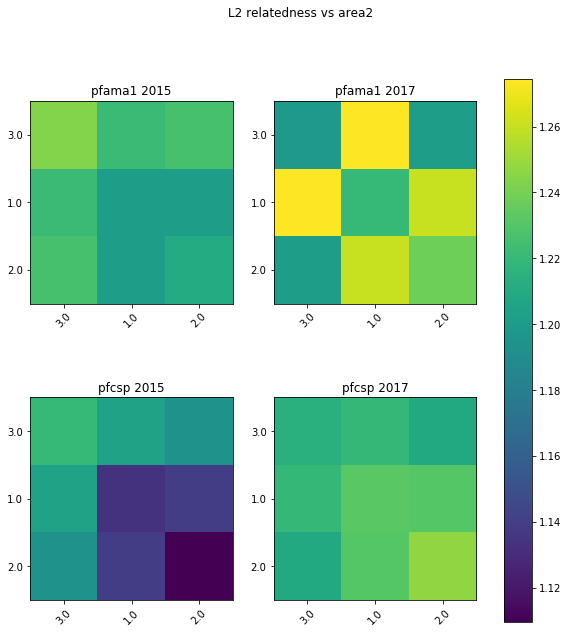

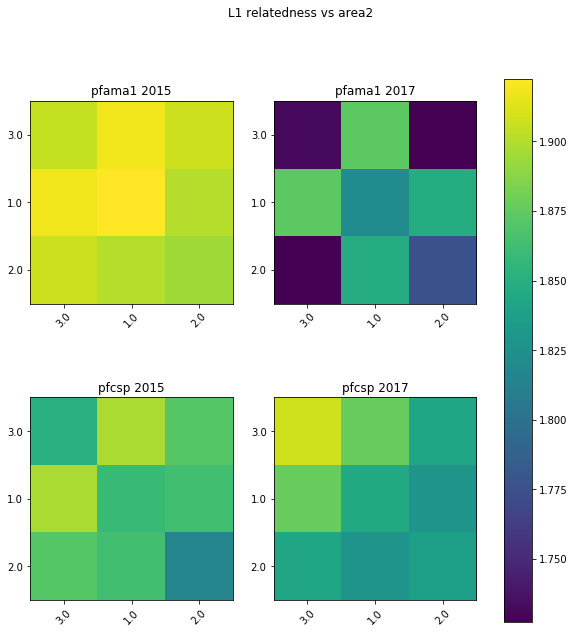

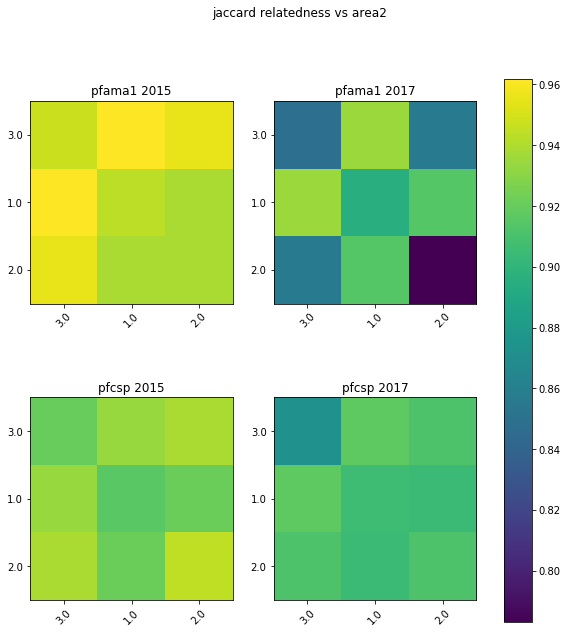

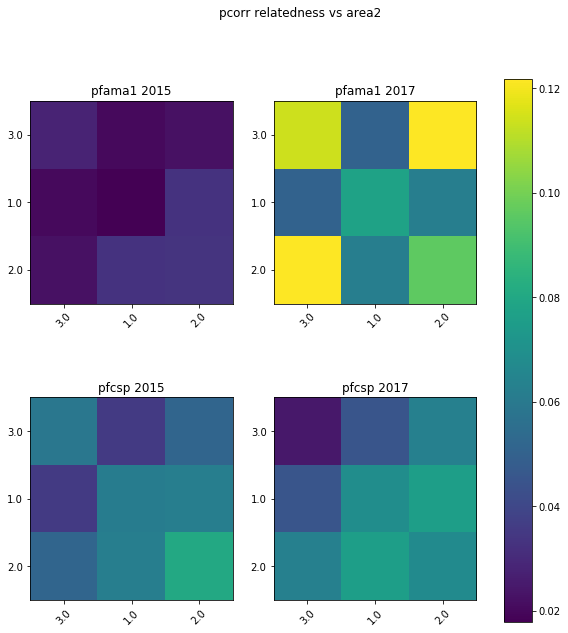

In [29]:
#Get haplotype frequencies from a selection
for category in ['gender', 'area', 'fevertemp', 'antimal', 'age_cat', 'den_cat', 'area2']: 
    types = data[category].unique()
    #list of all haplotype frequencies selected for each type
    haplotype_freqs_ama_pre = []
    haplotype_freqs_ama_post = []
    haplotype_freqs_csp_pre = []
    haplotype_freqs_csp_post = []
    for tt in types:
        hap_freq = np.array([merged_ama.loc[str(col)][:n_ama_haplotypes] for col in cols_pre if merged_ama.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_ama_pre.append(hap_freq)
        hap_freq = np.array([merged_ama.loc[str(col)][:n_ama_haplotypes] for col in cols_post if merged_ama.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_ama_post.append(hap_freq)
        hap_freq = np.array([merged_csp.loc[str(col)][:n_csp_haplotypes] for col in cols_pre if merged_csp.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_csp_pre.append(hap_freq)
        hap_freq = np.array([merged_csp.loc[str(col)][:n_csp_haplotypes] for col in cols_post if merged_csp.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_csp_post.append(hap_freq)
    
    #Get relatedness matrices for all metrics
    for mm in ['bin_sharing', 'L2', 'L1', 'jaccard', 'pcorr']:
        relat_cross_ama_pre = np.zeros((len(types), len(types)))
        relat_cross_ama_post = np.zeros((len(types), len(types)))
        relat_cross_csp_pre = np.zeros((len(types), len(types)))
        relat_cross_csp_post = np.zeros((len(types), len(types)))
        for ii, tt in enumerate(types):
            for jj, tt in enumerate(types):
                if jj == ii:
                    diag = True
                else:
                    diag = False
                #pfama1
                mat_ama_pre = relatedness_mat(haplotype_freqs_ama_pre[ii], haplotype_freqs_ama_pre[jj], method = mm)
                mat_ama_post = relatedness_mat(haplotype_freqs_ama_post[ii], haplotype_freqs_ama_post[jj], method = mm)
                relat_cross_ama_pre[ii,jj] = np.mean(mat_vals(mat_ama_pre, diag = diag))
                relat_cross_ama_post[ii,jj] = np.mean(mat_vals(mat_ama_post, diag = diag))
                #pfcsp
                mat_csp_pre = relatedness_mat(haplotype_freqs_csp_pre[ii], haplotype_freqs_csp_pre[jj], method = mm)
                mat_csp_post = relatedness_mat(haplotype_freqs_csp_post[ii], haplotype_freqs_csp_post[jj], method = mm)
                relat_cross_csp_pre[ii,jj] = np.mean(mat_vals(mat_csp_pre, diag = diag))
                relat_cross_csp_post[ii,jj] = np.mean(mat_vals(mat_csp_post, diag = diag))
                
        #Plot mean statistics between all them
        all_vals = np.concatenate((relat_cross_ama_pre, relat_cross_ama_post,relat_cross_csp_pre, relat_cross_csp_post))
        min_v = np.min(all_vals)
        max_v = np.max(all_vals)
        
        fig, axs = plt.subplots(2, 2)
        fig.set_size_inches([10,10])
        fig.suptitle(mm + ' relatedness vs ' + category)
            
        images = []
            
        images.append(axs[0,0].imshow(relat_cross_ama_pre, vmin = min_v, vmax = max_v))
        axs[0,0].set_title('pfama1 2015')
        axs[0,0].set_xticks(np.arange(len(types)))
        axs[0,0].set_xticklabels(types, rotation=45)
        axs[0,0].set_yticks(np.arange(len(types)))
        axs[0,0].set_yticklabels(types)
                
        images.append(axs[0,1].imshow(relat_cross_ama_post, vmin = min_v, vmax = max_v))
        axs[0,1].set_title('pfama1 2017')
        axs[0,1].set_xticks(np.arange(len(types)))
        axs[0,1].set_xticklabels(types, rotation=45)
        axs[0,1].set_yticks(np.arange(len(types)))
        axs[0,1].set_yticklabels(types)
                
        images.append(axs[1,0].imshow(relat_cross_csp_pre, vmin = min_v, vmax = max_v))
        axs[1,0].set_title('pfcsp 2015')
        axs[1,0].set_xticks(np.arange(len(types)))
        axs[1,0].set_xticklabels(types, rotation=45)
        axs[1,0].set_yticks(np.arange(len(types)))
        axs[1,0].set_yticklabels(types)
                
        images.append(axs[1,1].imshow(relat_cross_csp_post, vmin = min_v, vmax = max_v))
        axs[1,1].set_title('pfcsp 2017')
        axs[1,1].set_xticks(np.arange(len(types)))
        axs[1,1].set_xticklabels(types, rotation=45)
        axs[1,1].set_yticks(np.arange(len(types)))
        axs[1,1].set_yticklabels(types)
        
        fig.colorbar(images[3], ax = axs)
        plt.show()


In [28]:
mm = 'bin_sharing'
for ii in range(len(types)):
    for jj in range(len(types)):
        mat_ama_pre = relatedness_mat(haplotype_freqs_ama_pre[ii], haplotype_freqs_ama_pre[jj], method = mm)
        mat_ama_post = relatedness_mat(haplotype_freqs_ama_post[ii], haplotype_freqs_ama_post[jj], method = mm)
        if ii != jj:
            print_means(mat_ama_pre, mat_ama_post, mm + ' ' + types[ii] + ' vs ' + types[jj] + ' pfama1', diag = True)
        else:
            print_means(mat_ama_pre, mat_ama_post, mm + ' ' + types[ii] + ' vs ' + types[jj] + ' pfama1', diag = True)
        print("")
        mat_csp_pre = relatedness_mat(haplotype_freqs_csp_pre[ii], haplotype_freqs_csp_pre[jj], method = mm)
        mat_csp_post = relatedness_mat(haplotype_freqs_csp_post[ii], haplotype_freqs_csp_post[jj], method = mm)
        if ii != jj:
            print_means(mat_csp_pre, mat_csp_post, mm + ' ' + types[ii] + ' vs ' + types[jj] + ' pfcsp', diag = True)
        else:
            print_means(mat_csp_pre, mat_csp_post, mm + ' ' + types[ii] + ' vs ' + types[jj] + ' pfcsp', diag = True)
        print("")
        
mm = 'pcorr'
for ii in range(len(types)):
    for jj in range(len(types)):
        mat_ama_pre = relatedness_mat(haplotype_freqs_ama_pre[ii], haplotype_freqs_ama_pre[jj], method = mm)
        mat_ama_post = relatedness_mat(haplotype_freqs_ama_post[ii], haplotype_freqs_ama_post[jj], method = mm)
        if ii != jj:
            print_means(mat_ama_pre, mat_ama_post, mm + ' ' + types[ii] + ' vs ' + types[jj] + ' pfama1', diag = True)
        else:
            print_means(mat_ama_pre, mat_ama_post, mm + ' ' + types[ii] + ' vs ' + types[jj] + ' pfama1', diag = True)
        print("")
        mat_csp_pre = relatedness_mat(haplotype_freqs_csp_pre[ii], haplotype_freqs_csp_pre[jj], method = mm)
        mat_csp_post = relatedness_mat(haplotype_freqs_csp_post[ii], haplotype_freqs_csp_post[jj], method = mm)
        if ii != jj:
            print_means(mat_csp_pre, mat_csp_post, mm + ' ' + types[ii] + ' vs ' + types[jj] + ' pfcsp', diag = True)
        else:
            print_means(mat_csp_pre, mat_csp_post, mm + ' ' + types[ii] + ' vs ' + types[jj] + ' pfcsp', diag = True)
        print("")
        

TypeError: cannot concatenate 'str' and 'numpy.float64' objects

# Individual relatedness for each population 

### L2 

In [30]:
ind_dist_pre_ama = (np.sum(dist_mat_pre_ama, axis = 0) - 1.)/(len(dist_mat_pre_ama) - 1)
ind_dist_post_ama = (np.sum(dist_mat_post_ama, axis = 0) - 1.)/(len(dist_mat_post_ama) - 1)
ind_dist_pre_csp = (np.sum(dist_mat_pre_csp, axis = 0) - 1.)/(len(dist_mat_pre_csp) - 1)
ind_dist_post_csp = (np.sum(dist_mat_post_csp, axis = 0) - 1.)/(len(dist_mat_post_csp) - 1)

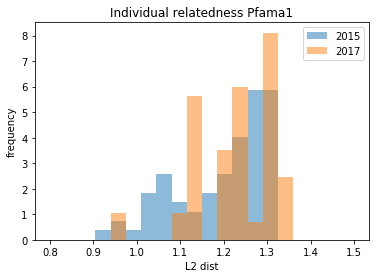

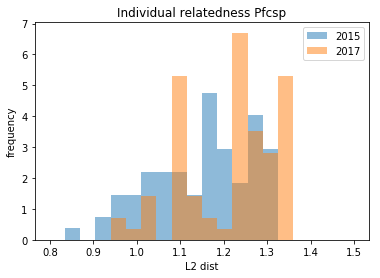

In [31]:
plt.hist(ind_dist_pre_ama, 20, normed = True, range = [0.8,1.5], label = '2015', alpha = .5)
plt.hist(ind_dist_post_ama, 20, normed = True, range = [0.8,1.5], label = '2017', alpha = .5)
plt.xlabel('L2 dist')
plt.title('Individual relatedness Pfama1')
plt.ylabel('frequency')
plt.legend()
plt.show()

plt.hist(ind_dist_pre_csp, 20, normed = True, range = [0.8,1.5], label = '2015', alpha = .5)
plt.hist(ind_dist_post_csp, 20, normed = True, range = [0.8,1.5], label = '2017', alpha = .5)
plt.xlabel('L2 dist')
plt.title('Individual relatedness Pfcsp')
plt.ylabel('frequency')
plt.legend()
plt.show()


### L1

In [32]:
ind_l1_pre_ama = (np.sum(l1_mat_pre_ama, axis = 0) - 1.)/(len(l1_mat_pre_ama) - 1)
ind_l1_post_ama = (np.sum(l1_mat_post_ama, axis = 0) - 1.)/(len(l1_mat_post_ama) - 1)
ind_l1_pre_csp = (np.sum(l1_mat_pre_csp, axis = 0) - 1.)/(len(l1_mat_pre_csp) - 1)
ind_l1_post_csp = (np.sum(l1_mat_post_csp, axis = 0) - 1.)/(len(l1_mat_post_csp) - 1)

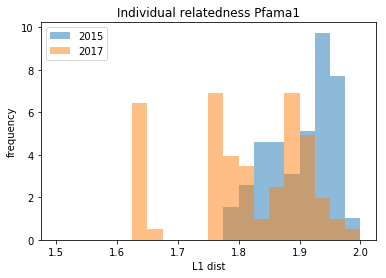

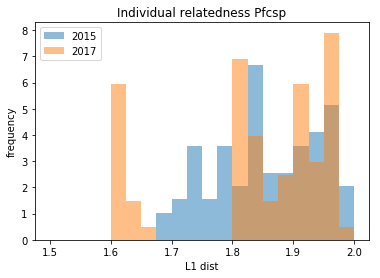

In [33]:
plt.hist(ind_l1_pre_ama, 20, normed = True, range = [1.5,2.], label = '2015', alpha = .5)
plt.hist(ind_l1_post_ama, 20, normed = True, range = [1.5,2], label = '2017', alpha = .5)
plt.xlabel('L1 dist')
plt.title('Individual relatedness Pfama1')
plt.ylabel('frequency')
plt.legend()
plt.show()

plt.hist(ind_l1_pre_csp, 20, normed = True, range = [1.5,2.], label = '2015', alpha = .5)
plt.hist(ind_l1_post_csp, 20, normed = True, range = [1.5,2.], label = '2017', alpha = .5)
plt.xlabel('L1 dist')
plt.title('Individual relatedness Pfcsp')
plt.ylabel('frequency')
plt.legend()
plt.show()


### Jaccard 

In [34]:
ind_jacc_pre_ama = (np.sum(jacc_mat_pre_ama, axis = 0) - 1.)/(len(jacc_mat_pre_ama) - 1)
ind_jacc_post_ama = (np.sum(jacc_mat_post_ama, axis = 0) - 1.)/(len(jacc_mat_post_ama) - 1)
ind_jacc_pre_csp = (np.sum(jacc_mat_pre_csp, axis = 0) - 1.)/(len(jacc_mat_pre_csp) - 1)
ind_jacc_post_csp = (np.sum(jacc_mat_post_csp, axis = 0) - 1.)/(len(jacc_mat_post_csp) - 1)

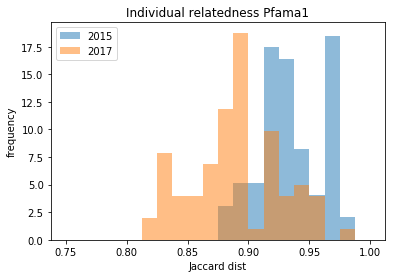

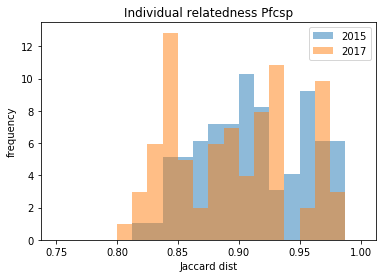

In [35]:
plt.hist(ind_jacc_pre_ama, 20, normed = True, range = [.75,1], label = '2015', alpha = .5)
plt.hist(ind_jacc_post_ama, 20, normed = True, range = [.75,1], label = '2017', alpha = .5)
plt.xlabel('Jaccard dist')
plt.title('Individual relatedness Pfama1')
plt.ylabel('frequency')
plt.legend()
plt.show()

plt.hist(ind_jacc_pre_csp, 20, normed = True, range = [.75,1], label = '2015', alpha = .5)
plt.hist(ind_jacc_post_csp, 20, normed = True, range = [.75,1], label = '2017', alpha = .5)
plt.xlabel('Jaccard dist')
plt.title('Individual relatedness Pfcsp')
plt.ylabel('frequency')
plt.legend()
plt.show()


### Pearson CC 

In [36]:
ind_pcorr_pre_ama = (np.sum(pcor_mat_pre_ama, axis = 0) - 1.)/(len(pcor_mat_pre_ama) - 1)
ind_pcorr_post_ama = (np.sum(pcor_mat_post_ama, axis = 0) - 1.)/(len(pcor_mat_post_ama) - 1)
ind_pcorr_pre_csp = (np.sum(pcor_mat_pre_csp, axis = 0) - 1.)/(len(pcor_mat_pre_csp) - 1)
ind_pcorr_post_csp = (np.sum(pcor_mat_post_csp, axis = 0) - 1.)/(len(pcor_mat_post_csp) - 1)

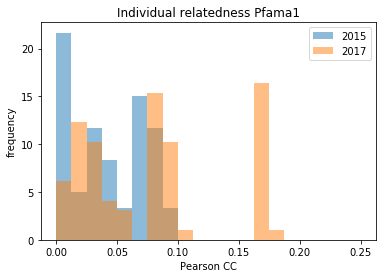

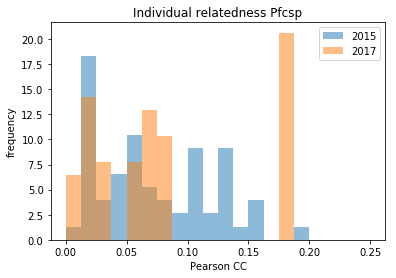

In [37]:
plt.hist(ind_pcorr_pre_ama, 20, normed = True, range = [0,.25], label = '2015', alpha = .5)
plt.hist(ind_pcorr_post_ama, 20, normed = True, range = [0,.25], label = '2017', alpha = .5)
plt.xlabel('Pearson CC')
plt.title('Individual relatedness Pfama1')
plt.ylabel('frequency')
plt.legend()
plt.show()

plt.hist(ind_pcorr_pre_csp, 20, normed = True, range = [0,.25], label = '2015', alpha = .5)
plt.hist(ind_pcorr_post_csp, 20, normed = True, range = [0,.25], label = '2017', alpha = .5)
plt.xlabel('Pearson CC')
plt.title('Individual relatedness Pfcsp')
plt.ylabel('frequency')
plt.legend()
plt.show()


# Individual relatedness vs other properties from data

### TODO:

- Get individual relatedness vs populations: histograms of individual relatedness within its population and in different populations (e.g. different areas, gender, etc.)

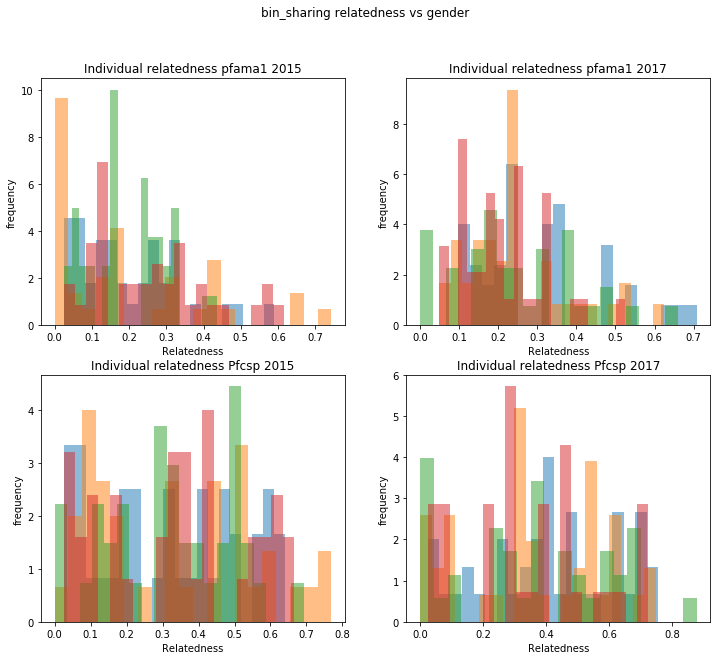

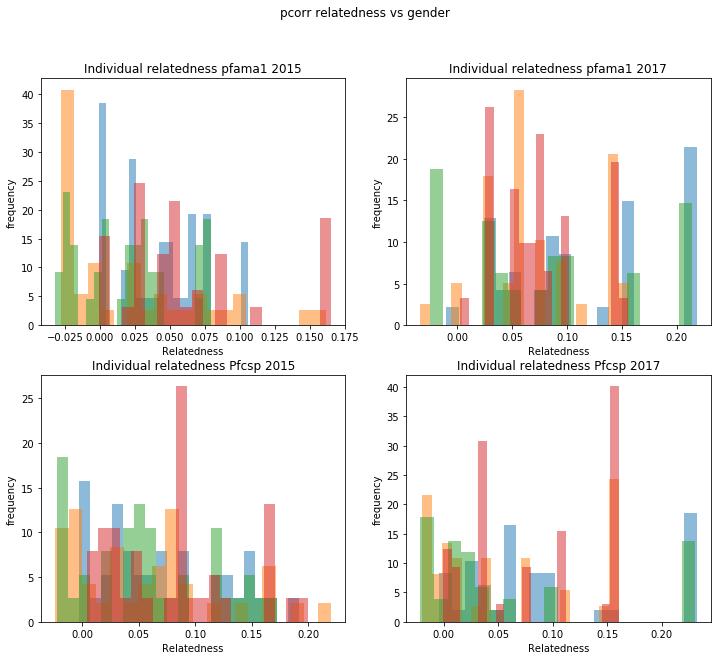

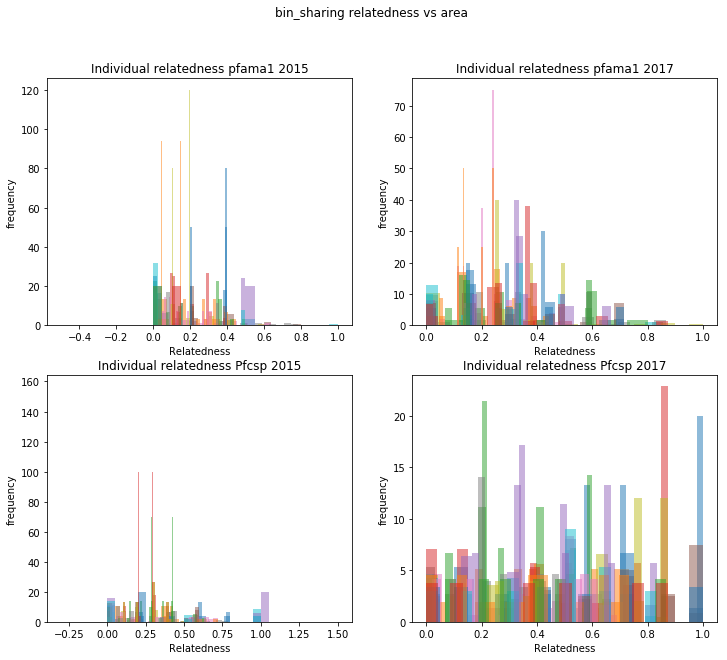

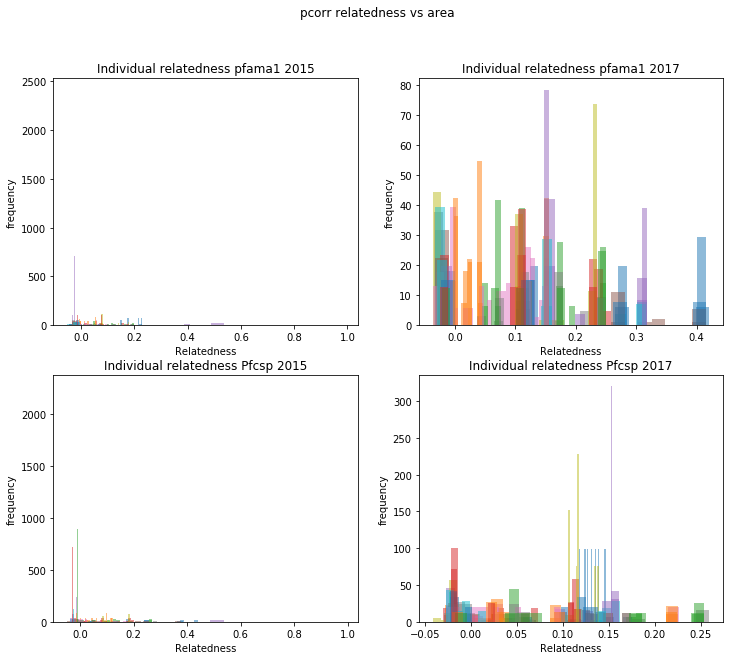

In [24]:
#Get haplotype frequencies from a selection
for category in ['gender', 'area']:#, 'fevertemp', 'antimal', 'age_cat', 'den_cat', 'area2']: 
    types = data[category].unique()
    #list of all haplotype frequencies selected for each type
    haplotype_freqs_ama_pre = []
    haplotype_freqs_ama_post = []
    haplotype_freqs_csp_pre = []
    haplotype_freqs_csp_post = []
    for tt in types:
        hap_freq = np.array([merged_ama.loc[str(col)][:n_ama_haplotypes] for col in cols_pre if merged_ama.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_ama_pre.append(hap_freq)
        hap_freq = np.array([merged_ama.loc[str(col)][:n_ama_haplotypes] for col in cols_post if merged_ama.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_ama_post.append(hap_freq)
        hap_freq = np.array([merged_csp.loc[str(col)][:n_csp_haplotypes] for col in cols_pre if merged_csp.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_csp_pre.append(hap_freq)
        hap_freq = np.array([merged_csp.loc[str(col)][:n_csp_haplotypes] for col in cols_post if merged_csp.loc[str(col)][category] == tt], dtype = float)
        haplotype_freqs_csp_post.append(hap_freq)
    
    #Get relatedness matrices for all metrics
    for mm in ['bin_sharing', 'pcorr']:#, 'L2', 'L1', 'jaccard', 'pcorr']:
        fig, axs = plt.subplots(2, 2)
        fig.set_size_inches([12,10])
        fig.suptitle(mm + ' relatedness vs ' + category)
        for ii, tt in enumerate(types):
            for jj, tt in enumerate(types):
                if jj == ii:
                    diag = True
                else:
                    diag = False
                ind_pcorr_pre_ama = np.zeros((len(types), len(types), len(haplotype_freqs_ama_pre[ii])))
                ind_pcorr_post_ama = np.zeros((len(types), len(types), len(haplotype_freqs_ama_post[ii])))
                ind_pcorr_pre_csp = np.zeros((len(types), len(types), len(haplotype_freqs_csp_pre[ii])))
                ind_pcorr_post_csp = np.zeros((len(types), len(types), len(haplotype_freqs_csp_post[ii])))
                #pfama1
                mat_ama_pre = relatedness_mat(haplotype_freqs_ama_pre[ii], haplotype_freqs_ama_pre[jj], method = mm)
                mat_ama_post = relatedness_mat(haplotype_freqs_ama_post[ii], haplotype_freqs_ama_post[jj], method = mm)
                #relat_cross_ama_pre[ii,jj] = np.mean(mat_vals(mat_ama_pre, diag = diag))
                #relat_cross_ama_post[ii,jj] = np.mean(mat_vals(mat_ama_post, diag = diag))
                #pfcsp
                mat_csp_pre = relatedness_mat(haplotype_freqs_csp_pre[ii], haplotype_freqs_csp_pre[jj], method = mm)
                mat_csp_post = relatedness_mat(haplotype_freqs_csp_post[ii], haplotype_freqs_csp_post[jj], method = mm)
                #relat_cross_csp_pre[ii,jj] = np.mean(mat_vals(mat_csp_pre, diag = diag))
                #relat_cross_csp_post[ii,jj] = np.mean(mat_vals(mat_csp_post, diag = diag))
                
                ind_pcorr_pre_ama[ii,jj] = np.mean(mat_ama_pre, axis = 1)
                ind_pcorr_post_ama[ii,jj] = np.mean(mat_ama_post, axis = 1)
                ind_pcorr_pre_csp[ii,jj] = np.mean(mat_csp_pre, axis = 1)
                ind_pcorr_post_csp[ii,jj] = np.mean(mat_csp_post, axis = 1)
                
        #Plot mean statistics between all them
          
                axs[0,0].hist(ind_pcorr_pre_ama[ii,jj], 20, normed = True, label = types[ii] + ' vs ' + types[jj], alpha = .5)

                axs[0,1].hist(ind_pcorr_post_ama[ii,jj], 20, normed = True, label = types[ii] + ' vs ' + types[jj], alpha = .5)
        
                axs[1,0].hist(ind_pcorr_pre_csp[ii,jj], 20, normed = True, label = types[ii] + ' vs ' + types[jj], alpha = .5)

                axs[1,1].hist(ind_pcorr_post_csp[ii,jj], 20, normed = True, label = types[ii] + ' vs ' + types[jj], alpha = .5)
                
        axs[0,0].set_xlabel('Relatedness')
        axs[0,0].set_ylabel('frequency')
        #axs[0,0].legend()
        axs[0,0].set_title('Individual relatedness pfama1 2015')
        
        axs[0,1].set_xlabel('Relatedness')
        axs[0,1].set_ylabel('frequency')
        #axs[0,1].legend()
        axs[0,1].set_title('Individual relatedness pfama1 2017')
        
        axs[1,0].set_xlabel('Relatedness')
        axs[1,0].set_ylabel('frequency')
        #axs[1,0].legend()
        axs[1,0].set_title('Individual relatedness Pfcsp 2015')

        axs[1,1].set_xlabel('Relatedness')
        axs[1,1].set_ylabel('frequency')
        #axs[1,1].legend()
        axs[1,1].set_title('Individual relatedness Pfcsp 2017')

        
        plt.show()


# Correlation between different metrics

### TODO:

- Scatter or hexbin plots and Pearson CCs between all metrics for pre and post ama and csp

- make matrix/table showing the Pearson CC for all comparisons

- scatter and Pearson CC for non-identical cases, for high and low extremes for BS = 0 and BS = 1

In [37]:
all_l1 = np.concatenate((mat_vals(l1_mat_pre_ama), mat_vals(l1_mat_post_ama), mat_vals(l1_mat_pre_csp), mat_vals(l1_mat_post_csp)))
all_dist = np.concatenate((mat_vals(dist_mat_pre_ama), mat_vals(dist_mat_post_ama), mat_vals(dist_mat_pre_csp), mat_vals(dist_mat_post_csp)))
all_bin = np.concatenate((mat_vals(bin_mat_pre_ama), mat_vals(bin_mat_post_ama), mat_vals(bin_mat_pre_csp), mat_vals(bin_mat_post_csp)))
all_jacc = np.concatenate((mat_vals(jacc_mat_pre_ama), mat_vals(jacc_mat_post_ama), mat_vals(jacc_mat_pre_csp), mat_vals(jacc_mat_post_csp)))
all_pcor = np.concatenate((mat_vals(pcor_mat_pre_ama), mat_vals(pcor_mat_post_ama), mat_vals(pcor_mat_pre_csp), mat_vals(pcor_mat_post_csp)))

### Scatter comparisons

Pearson CC between BS and BS: 1.0
Pearson CC between BS and JD: -0.7484726265316249


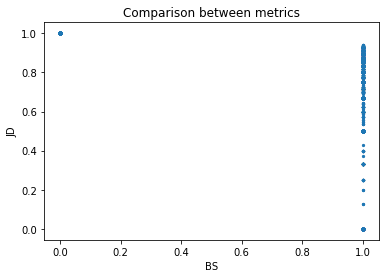

Pearson CC between BS and L1: -0.4989407751578469


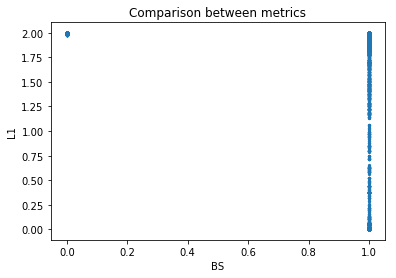

Pearson CC between BS and L2: -0.5425968325150965


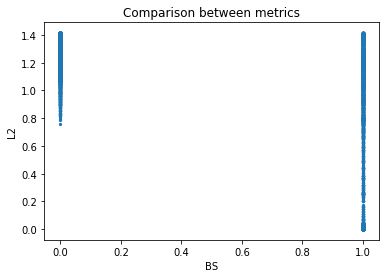

Pearson CC between BS and PCC: 0.5130052285855075


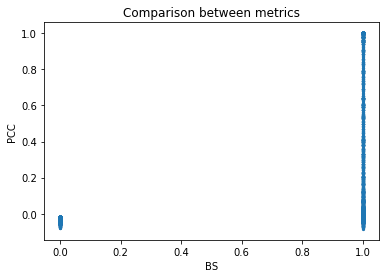

Pearson CC between JD and BS: -0.7484726265316249
Pearson CC between JD and JD: 1.0
Pearson CC between JD and L1: 0.7095583865126056


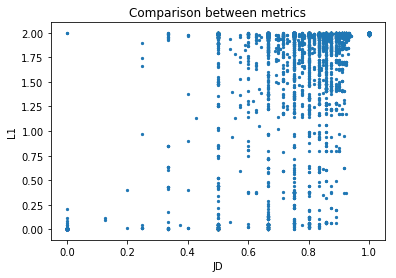

Pearson CC between JD and L2: 0.6545439975136708


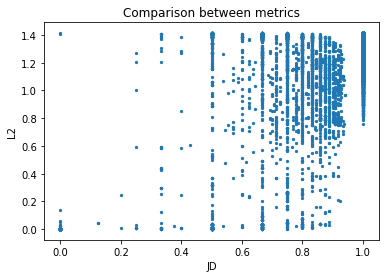

Pearson CC between JD and PCC: -0.6747491284220719


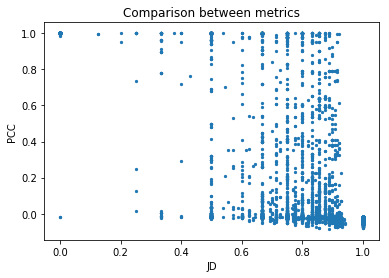

Pearson CC between L1 and BS: -0.4989407751578469
Pearson CC between L1 and JD: 0.7095583865126056
Pearson CC between L1 and L1: 1.0
Pearson CC between L1 and L2: 0.9148769006580837


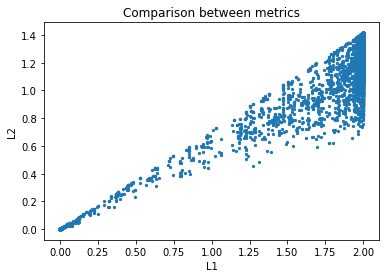

Pearson CC between L1 and PCC: -0.9804357577919827


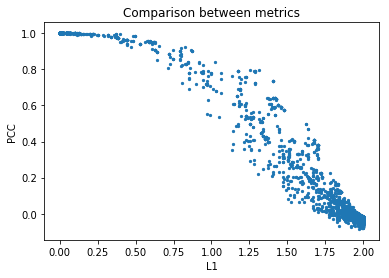

Pearson CC between L2 and BS: -0.5425968325150965
Pearson CC between L2 and JD: 0.6545439975136708
Pearson CC between L2 and L1: 0.9148769006580837
Pearson CC between L2 and L2: 1.0
Pearson CC between L2 and PCC: -0.8928712767274041


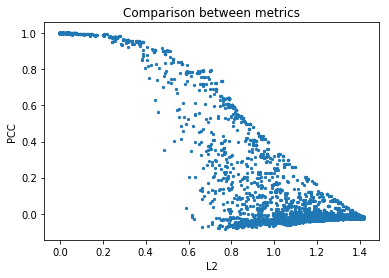

Pearson CC between PCC and BS: 0.5130052285855075
Pearson CC between PCC and JD: -0.6747491284220719
Pearson CC between PCC and L1: -0.9804357577919827
Pearson CC between PCC and L2: -0.8928712767274041
Pearson CC between PCC and PCC: 1.0


In [51]:
metrics = ['BS', 'JD', 'L1', 'L2', 'PCC']
list_metrics = [all_bin, all_jacc, all_l1, all_dist, all_pcor]
pcorrs = np.zeros((len(metrics), len(metrics)))
for ii, m1 in enumerate(list_metrics):
    for jj, m2 in enumerate(list_metrics):
        pcc = sci_stats.pearsonr(m1, m2)[0]
        pcorrs[ii,jj] = pcc
        print("Pearson CC between "+metrics[ii]+" and "+metrics[jj]+": " + str(pcc))
        if ii < jj:
            plt.scatter(m1, m2, s = 5)
            plt.title('Comparison between metrics')
            plt.xlabel(metrics[ii])
            plt.ylabel(metrics[jj])
            plt.savefig(save_path + metrics[ii] + '_vs_' + metrics[jj] + '.pdf')
            plt.show()


Pearson CC between JD and JD: 1.0
Pearson CC between JD and L1: 0.7095583865126056


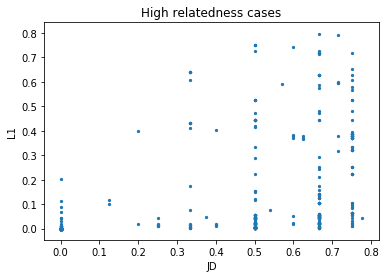

Pearson CC for high relatedness cases between JD and L1: 0.44789578486910075


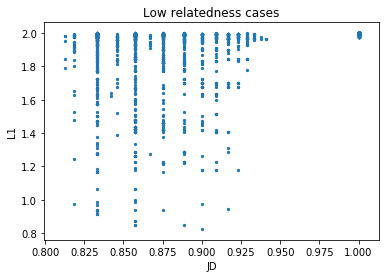

Pearson CC for low relatedness cases between JD and L1: 0.5271106114011456


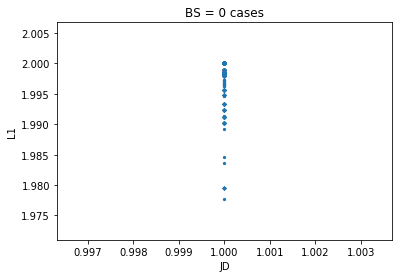

Pearson CC for BS = 0 cases between JD and L1: nan


/Users/arnau/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


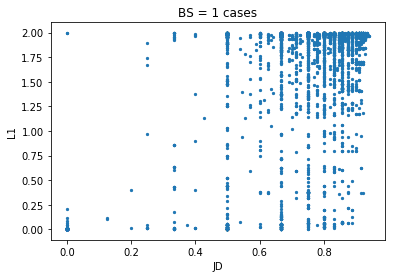

Pearson CC for BS = 1 cases between JD and L1: 0.5848335808002153
Pearson CC between JD and L2: 0.6545439975136708


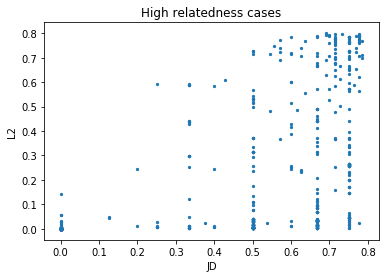

Pearson CC for high relatedness cases between JD and L2: 0.5298909031590459


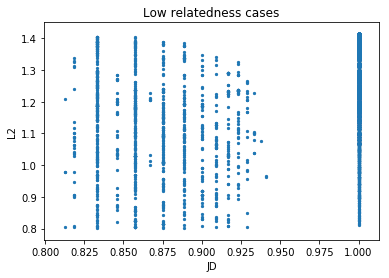

Pearson CC for low relatedness cases between JD and L2: 0.4297041194687809


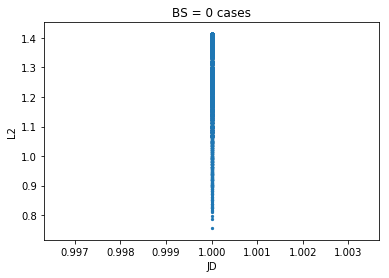

Pearson CC for BS = 0 cases between JD and L2: nan


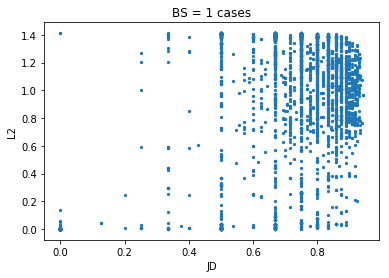

Pearson CC for BS = 1 cases between JD and L2: 0.4824579832271806
Pearson CC between JD and PCC: -0.6747491284220719


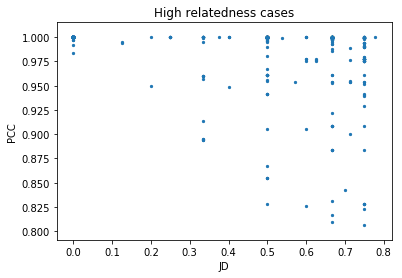

Pearson CC for high relatedness cases between JD and PCC: -0.2937266339514261


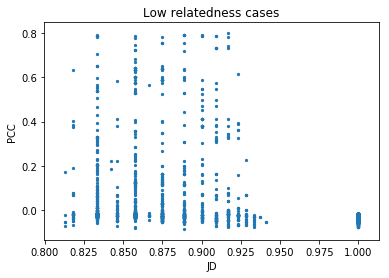

Pearson CC for low relatedness cases between JD and PCC: -0.4358117689727932


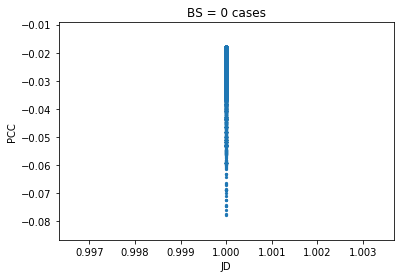

Pearson CC for BS = 0 cases between JD and PCC: nan


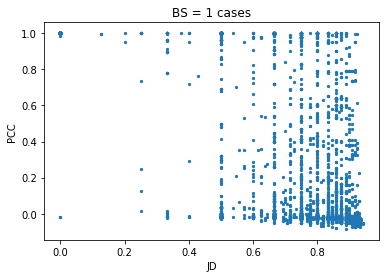

Pearson CC for BS = 1 cases between JD and PCC: -0.5110731533352707
Pearson CC between L1 and JD: 0.7095583865126056
Pearson CC between L1 and L1: 1.0
Pearson CC between L1 and L2: 0.9148769006580837


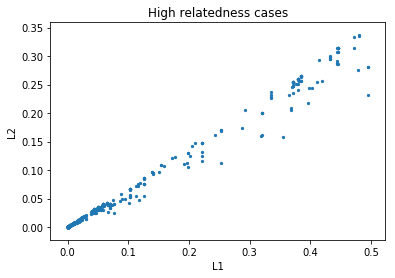

Pearson CC for high relatedness cases between L1 and L2: 0.9942843350448347


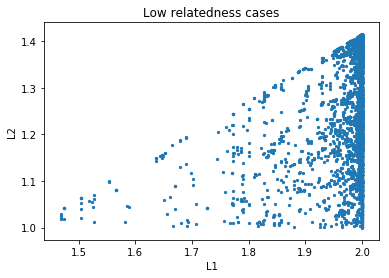

Pearson CC for low relatedness cases between L1 and L2: 0.3198580723493264


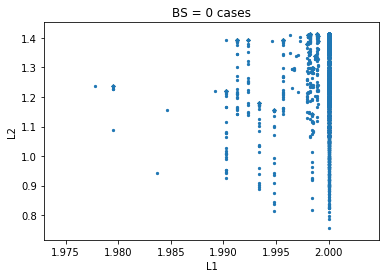

Pearson CC for BS = 0 cases between L1 and L2: 0.11839363892042613


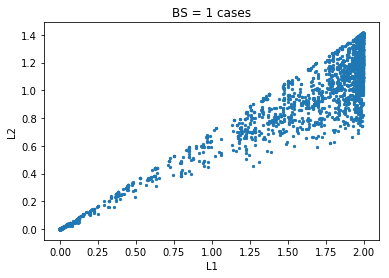

Pearson CC for BS = 1 cases between L1 and L2: 0.9570933384599443
Pearson CC between L1 and PCC: -0.9804357577919827


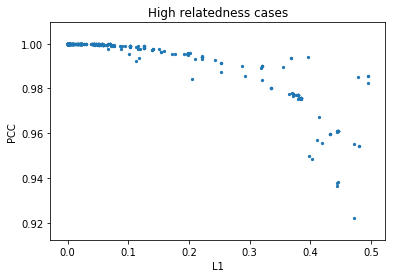

Pearson CC for high relatedness cases between L1 and PCC: -0.8848329335976334


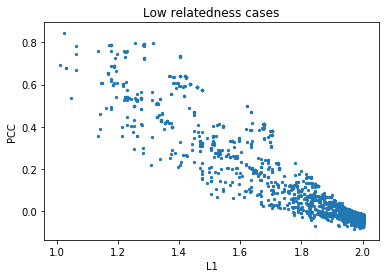

Pearson CC for low relatedness cases between L1 and PCC: -0.943577189593085


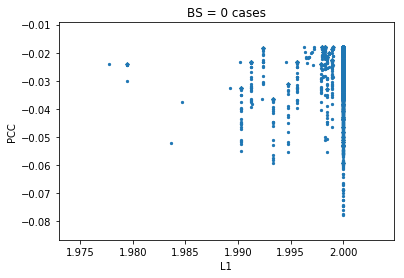

Pearson CC for BS = 0 cases between L1 and PCC: 0.07642977810611717


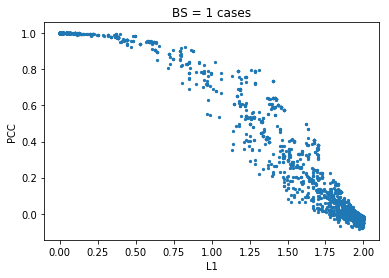

Pearson CC for BS = 1 cases between L1 and PCC: -0.9744009633501828
Pearson CC between L2 and JD: 0.6545439975136708
Pearson CC between L2 and L1: 0.9148769006580837
Pearson CC between L2 and L2: 1.0
Pearson CC between L2 and PCC: -0.8928712767274041


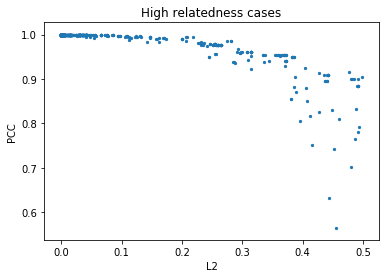

Pearson CC for high relatedness cases between L2 and PCC: -0.7770182909457012


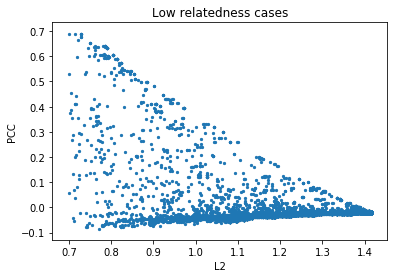

Pearson CC for low relatedness cases between L2 and PCC: -0.47030145574213084


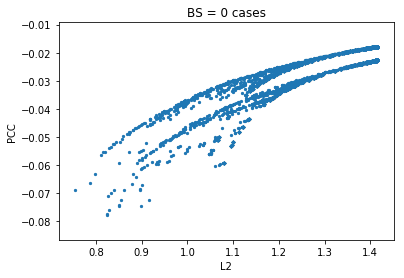

Pearson CC for BS = 0 cases between L2 and PCC: 0.8630350100550849


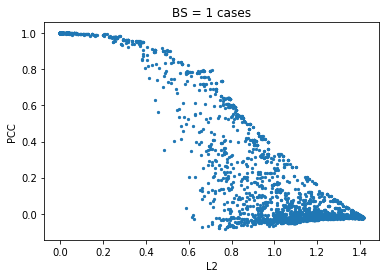

Pearson CC for BS = 1 cases between L2 and PCC: -0.9339550736472493
Pearson CC between PCC and JD: -0.6747491284220719
Pearson CC between PCC and L1: -0.9804357577919827
Pearson CC between PCC and L2: -0.8928712767274041
Pearson CC between PCC and PCC: 1.0


In [39]:
#Same as before but for extremes relatedness cases
metrics = ['JD', 'L1', 'L2', 'PCC']
high_relatedness_vals = [.8, .5, .5, .6]
low_relatedness_vals = [.8, 1., .7, .5]
list_metrics = [all_jacc, all_l1, all_dist, all_pcor]
pcorrs = np.zeros((len(metrics), len(metrics)))
for ii, m1 in enumerate(list_metrics):
    for jj, m2 in enumerate(list_metrics):
        pcc = sci_stats.pearsonr(m1, m2)[0]
        pcorrs[ii,jj] = pcc
        print("Pearson CC between "+metrics[ii]+" and "+metrics[jj]+": " + str(pcc))
        if ii < jj:
            if metrics[ii] == 'PCC':
                filt1 = m1 > high_relatedness_vals[ii]
            else:
                filt1 = m1 < high_relatedness_vals[ii]
            if metrics[jj] == 'PCC':
                filt2 = m2 > high_relatedness_vals[ii]
            else:
                filt2 = m2 < high_relatedness_vals[ii]
            plt.scatter(m1[filt1*filt2], m2[filt1*filt2], s = 5)
            plt.title('High relatedness cases')
            plt.xlabel(metrics[ii])
            plt.ylabel(metrics[jj])
            plt.show()
            pcc = sci_stats.pearsonr(m1[filt1*filt2], m2[filt1*filt2])[0]
            print("Pearson CC for high relatedness cases between "+metrics[ii]+" and "+metrics[jj]+": " + str(pcc))
            
            if metrics[ii] == 'PCC':
                filt1 = m1 < low_relatedness_vals[ii]
            else:
                filt1 = m1 > low_relatedness_vals[ii]
            if metrics[jj] == 'PCC':
                filt2 = m2 < low_relatedness_vals[ii]
            else:
                filt2 = m2 > low_relatedness_vals[ii]
            plt.scatter(m1[filt1*filt2], m2[filt1*filt2], s = 5)
            plt.title('Low relatedness cases')
            plt.xlabel(metrics[ii])
            plt.ylabel(metrics[jj])
            plt.show()
            pcc = sci_stats.pearsonr(m1[filt1*filt2], m2[filt1*filt2])[0]
            print("Pearson CC for low relatedness cases between "+metrics[ii]+" and "+metrics[jj]+": " + str(pcc))
            
            filt = all_bin == 0
            plt.scatter(m1[filt], m2[filt], s = 5)
            plt.title('BS = 0 cases')
            plt.xlabel(metrics[ii])
            plt.ylabel(metrics[jj])
            plt.show()
            pcc = sci_stats.pearsonr(m1[filt], m2[filt])[0]
            print("Pearson CC for BS = 0 cases between "+metrics[ii]+" and "+metrics[jj]+": " + str(pcc))

            
            filt = all_bin == 1
            plt.scatter(m1[filt], m2[filt], s = 5)
            plt.title('BS = 1 cases')
            plt.xlabel(metrics[ii])
            plt.ylabel(metrics[jj])
            plt.show()
            pcc = sci_stats.pearsonr(m1[filt], m2[filt])[0]
            print("Pearson CC for BS = 1 cases between "+metrics[ii]+" and "+metrics[jj]+": " + str(pcc))


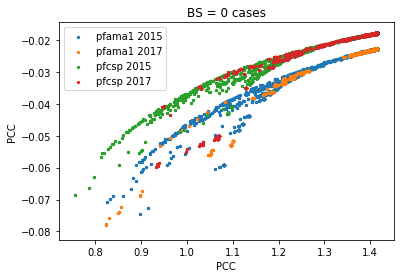

In [40]:
filt = bin_mat_pre_ama == 0
plt.scatter(dist_mat_pre_ama[filt], pcor_mat_pre_ama[filt], s = 5, label = 'pfama1 2015')
filt = bin_mat_post_ama == 0
plt.scatter(dist_mat_post_ama[filt], pcor_mat_post_ama[filt], s = 5, label = 'pfama1 2017')
filt = bin_mat_pre_csp == 0
plt.scatter(dist_mat_pre_csp[filt], pcor_mat_pre_csp[filt], s = 5, label = 'pfcsp 2015')
filt = bin_mat_post_csp == 0
plt.scatter(dist_mat_post_csp[filt], pcor_mat_post_csp[filt], s = 5, label = 'pfcsp 2017')
plt.title('BS = 0 cases')
plt.xlabel(metrics[ii])
plt.ylabel(metrics[jj])
plt.legend()
plt.show()

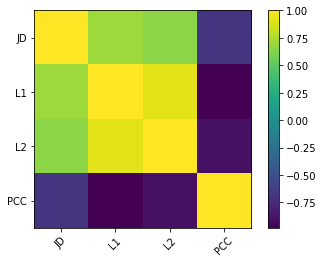

In [41]:
plt.imshow(pcorrs)
plt.xticks(np.arange(len(metrics)), metrics, rotation=45)
plt.yticks(np.arange(len(metrics)), metrics)
plt.colorbar()

# TEST 

### This tests measures the change in the metrics for random samples due to the reduction of haplotypes

In [126]:
n_s_pre = 78
n_s_post = 81
n_pre_ama = 43
n_post_ama = 10
n_pre_csp = 49
n_post_csp = 40
pre_ama = np.zeros((n_s_pre,n_pre_ama))
post_ama = np.zeros((n_s_post,n_post_ama))
pre_csp = np.zeros((n_s_pre,n_pre_csp))
post_csp = np.zeros((n_s_post,n_post_csp))
ii = 4
for i in range(n_s_pre):
    for j in range(ii):
        randint = np.random.randint(n_pre_ama)
        pre_ama[i, randint] += 1./ii
        randint = np.random.randint(n_pre_csp)
        pre_csp[i, randint] += 1./ii
for i in range(n_s_post):
    for j in range(ii):
        randint = np.random.randint(n_post_ama)
        post_ama[i, randint] += 1./ii
        randint = np.random.randint(n_post_csp)
        post_csp[i, randint] += 1./ii

In [127]:
print("bs ama")
mean_pre_bs, err_pre_bs = mat_mean_err(relatedness_mat(pre_ama,pre_ama, method = 'bin_sharing'))
print(str(round(mean_pre_bs, 4)) + ' (' + str(round(err_pre_bs, 4)) + ')')

mean_post_bs, err_post_bs = mat_mean_err(relatedness_mat(post_ama,post_ama, method = 'bin_sharing'))
print(str(round(mean_post_bs, 4)) + ' (' + str(round(err_post_bs, 4)) + ')')
get_diff_err_pow(mean_pre_bs, err_pre_bs, mean_post_bs, err_post_bs)
print("")

print("bs csp")
mean_pre_bs, err_pre_bs = mat_mean_err(relatedness_mat(pre_csp,pre_csp, method = 'bin_sharing'))
print(str(round(mean_pre_bs, 4)) + ' (' + str(round(err_pre_bs, 4)) + ')')

mean_post_bs, err_post_bs = mat_mean_err(relatedness_mat(post_csp,post_csp, method = 'bin_sharing'))
print(str(round(mean_post_bs, 4)) + ' (' + str(round(err_post_bs, 4)) + ')')
get_diff_err_pow(mean_pre_bs, err_pre_bs, mean_post_bs, err_post_bs)
print("")

print("jd ama")

mean_pre_jd, err_pre_jd = mat_mean_err(relatedness_mat(pre_ama,pre_ama, method = 'jaccard'))
print(str(round(mean_pre_jd, 4)) + ' (' + str(round(err_pre_jd, 4)) + ')')
    
mean_post_jd, err_post_jd = mat_mean_err(relatedness_mat(post_ama,post_ama, method = 'jaccard'))
print(str(round(mean_post_jd, 4)) + ' (' + str(round(err_post_jd, 4)) + ')')
get_diff_err_pow(mean_pre_jd, err_pre_jd, mean_post_jd, err_post_jd)
print("")

print("jd csp")

mean_pre_jd, err_pre_jd = mat_mean_err(relatedness_mat(pre_csp,pre_csp, method = 'jaccard'))
print(str(round(mean_pre_jd, 4)) + ' (' + str(round(err_pre_jd, 4)) + ')')
    
mean_post_jd, err_post_jd = mat_mean_err(relatedness_mat(post_csp,post_csp, method = 'jaccard'))
print(str(round(mean_post_jd, 4)) + ' (' + str(round(err_post_jd, 4)) + ')')
get_diff_err_pow(mean_pre_jd, err_pre_jd, mean_post_jd, err_post_jd)
print("")

print("l1 ama")

mean_pre_l1, err_pre_l1 = mat_mean_err(relatedness_mat(pre_ama,pre_ama, method = 'L1'))
print(str(round(mean_pre_l1, 4)) + ' (' + str(round(err_pre_l1, 4)) + ')')
     
mean_post_l1, err_post_l1 = mat_mean_err(relatedness_mat(post_ama,post_ama, method = 'L1'))
print(str(round(mean_post_l1, 4)) + ' (' + str(round(err_post_l1, 4)) + ')')
get_diff_err_pow(mean_pre_l1, err_pre_l1, mean_post_l1, err_post_l1)
print("")

print("l1 csp")

mean_pre_l1, err_pre_l1 = mat_mean_err(relatedness_mat(pre_csp,pre_csp, method = 'L1'))
print(str(round(mean_pre_l1, 4)) + ' (' + str(round(err_pre_l1, 4)) + ')')
     
mean_post_l1, err_post_l1 = mat_mean_err(relatedness_mat(post_csp,post_csp, method = 'L1'))
print(str(round(mean_post_l1, 4)) + ' (' + str(round(err_post_l1, 4)) + ')')
get_diff_err_pow(mean_pre_l1, err_pre_l1, mean_post_l1, err_post_l1)
print("")

print("l2 ama") 
    
mean_pre_l2, err_pre_l2 = mat_mean_err(relatedness_mat(pre_ama,pre_ama, method = 'L2'))
print(str(round(mean_pre_l2, 4)) + ' (' + str(round(err_pre_l2, 4)) + ')')
    
mean_post_l2, err_post_l2 = mat_mean_err(relatedness_mat(post_ama,post_ama, method = 'L2'))
print(str(round(mean_post_l2, 4)) + ' (' + str(round(err_post_l2, 4)) + ')')
get_diff_err_pow(mean_pre_l2, err_pre_l2, mean_post_l2, err_post_l2)
print("")

print("l2 csp") 
    
mean_pre_l2, err_pre_l2 = mat_mean_err(relatedness_mat(pre_csp,pre_csp, method = 'L2'))
print(str(round(mean_pre_l2, 4)) + ' (' + str(round(err_pre_l2, 4)) + ')')
    
mean_post_l2, err_post_l2 = mat_mean_err(relatedness_mat(post_csp,post_csp, method = 'L2'))
print(str(round(mean_post_l2, 4)) + ' (' + str(round(err_post_l2, 4)) + ')')
get_diff_err_pow(mean_pre_l2, err_pre_l2, mean_post_l2, err_post_l2)
print("")


print("pcc ama") 
    
mean_pre_pcor, err_pre_pcor = mat_mean_err(relatedness_mat(pre_ama,pre_ama, method = 'pcorr'))
print(str(round(mean_pre_pcor, 4)) + ' (' + str(round(err_pre_pcor, 4)) + ')')

mean_post_pcor, err_post_pcor = mat_mean_err(relatedness_mat(post_ama,post_ama, method = 'pcorr'))
print(str(round(mean_post_pcor, 4)) + ' (' + str(round(err_post_pcor, 4)) + ')')
get_diff_err_pow(mean_pre_pcor, err_pre_pcor, mean_post_pcor, err_post_pcor)
print("")

print("pcc csp") 
    
mean_pre_pcor, err_pre_pcor = mat_mean_err(relatedness_mat(pre_csp,pre_csp, method = 'pcorr'))
print(str(round(mean_pre_pcor, 4)) + ' (' + str(round(err_pre_pcor, 4)) + ')')

mean_post_pcor, err_post_pcor = mat_mean_err(relatedness_mat(post_csp,post_csp, method = 'pcorr'))
print(str(round(mean_post_pcor, 4)) + ' (' + str(round(err_post_pcor, 4)) + ')')
get_diff_err_pow(mean_pre_pcor, err_pre_pcor, mean_post_pcor, err_post_pcor)
print("")

bs ama
0.307 (0.0095)
0.8321 (0.0227)
Difference in measurements: 0.5251+/-0.0246, p = 0.0

bs csp
0.2744 (0.0103)
0.3241 (0.0092)
Difference in measurements: 0.0497+/-0.0138, p = 0.0003

jd ama
0.9472 (0.0021)
0.763 (0.0079)
Difference in measurements: -0.1843+/-0.0082, p = 0.0

jd csp
0.9535 (0.0024)
0.9452 (0.0024)
Difference in measurements: -0.0083+/-0.0034, p = 0.0144

l1 ama
1.828 (0.007)
1.362 (0.0241)
Difference in measurements: -0.466+/-0.0251, p = 0.0

l1 csp
1.848 (0.007)
1.8213 (0.0087)
Difference in measurements: -0.0267+/-0.0111, p = 0.0166

l2 ama
0.6959 (0.0073)
0.6394 (0.0123)
Difference in measurements: -0.0565+/-0.0143, p = 0.0001

l2 csp
0.7017 (0.0065)
0.6972 (0.0075)
Difference in measurements: -0.0045+/-0.0099, p = 0.6474

pcc ama
-0.0013 (0.0035)
0.0253 (0.0184)
Difference in measurements: 0.0266+/-0.0187, p = 0.1549

pcc csp
0.0002 (0.0035)
-0.0034 (0.003)
Difference in measurements: -0.0036+/-0.0046, p = 0.4398



In [110]:
n_s_pre = 78
n_s_post = 81
n_pre_ama = 43
n_post_ama = 23
n_pre_csp = 49
n_post_csp = 40
pre_ama = np.zeros((n_s_pre,n_pre_ama))
post_ama = np.zeros((n_s_post,n_post_ama))
pre_csp = np.zeros((n_s_pre,n_pre_csp))
post_csp = np.zeros((n_s_post,n_post_csp))
for i in range(n_s_pre):
    for j in range(4):
        randint = np.random.randint(n_pre_ama)
        pre_ama[i, randint] += .25
        randint = np.random.randint(n_pre_csp)
        pre_csp[i, randint] += .25
for i in range(n_s_post):
    for j in range(4):
        randint = np.random.randint(n_post_ama)
        post_ama[i, randint] += .25
        randint = np.random.randint(n_post_csp)
        post_csp[i, randint] += .25

In [114]:
print("bs ama")
mean_pre_bs, err_pre_bs = mat_mean_err(relatedness_mat(pre_ama,pre_ama, method = 'bin_sharing'))
print(str(round(mean_pre_bs, 4)) + ' (' + str(round(err_pre_bs, 4)) + ')')

mean_post_bs, err_post_bs = mat_mean_err(relatedness_mat(post_ama,post_ama, method = 'bin_sharing'))
print(str(round(mean_post_bs, 4)) + ' (' + str(round(err_post_bs, 4)) + ')')
get_diff_err_pow(mean_pre_bs, err_pre_bs, mean_post_bs, err_post_bs)
print("")

print("bs csp")
mean_pre_bs, err_pre_bs = mat_mean_err(relatedness_mat(pre_csp,pre_csp, method = 'bin_sharing'))
print(str(round(mean_pre_bs, 4)) + ' (' + str(round(err_pre_bs, 4)) + ')')

mean_post_bs, err_post_bs = mat_mean_err(relatedness_mat(post_csp,post_csp, method = 'bin_sharing'))
print(str(round(mean_post_bs, 4)) + ' (' + str(round(err_post_bs, 4)) + ')')
get_diff_err_pow(mean_pre_bs, err_pre_bs, mean_post_bs, err_post_bs)
print("")

print("jd ama")

mean_pre_jd, err_pre_jd = mat_mean_err(relatedness_mat(pre_ama,pre_ama, method = 'jaccard'))
print(str(round(mean_pre_jd, 4)) + ' (' + str(round(err_pre_jd, 4)) + ')')
    
mean_post_jd, err_post_jd = mat_mean_err(relatedness_mat(post_ama,post_ama, method = 'jaccard'))
print(str(round(mean_post_jd, 4)) + ' (' + str(round(err_post_jd, 4)) + ')')
get_diff_err_pow(mean_pre_jd, err_pre_jd, mean_post_jd, err_post_jd)
print("")

print("jd csp")

mean_pre_jd, err_pre_jd = mat_mean_err(relatedness_mat(pre_csp,pre_csp, method = 'jaccard'))
print(str(round(mean_pre_jd, 4)) + ' (' + str(round(err_pre_jd, 4)) + ')')
    
mean_post_jd, err_post_jd = mat_mean_err(relatedness_mat(post_csp,post_csp, method = 'jaccard'))
print(str(round(mean_post_jd, 4)) + ' (' + str(round(err_post_jd, 4)) + ')')
get_diff_err_pow(mean_pre_jd, err_pre_jd, mean_post_jd, err_post_jd)
print("")

print("l1 ama")

mean_pre_l1, err_pre_l1 = mat_mean_err(relatedness_mat(pre_ama,pre_ama, method = 'L1'))
print(str(round(mean_pre_l1, 4)) + ' (' + str(round(err_pre_l1, 4)) + ')')
     
mean_post_l1, err_post_l1 = mat_mean_err(relatedness_mat(post_ama,post_ama, method = 'L1'))
print(str(round(mean_post_l1, 4)) + ' (' + str(round(err_post_l1, 4)) + ')')
get_diff_err_pow(mean_pre_l1, err_pre_l1, mean_post_l1, err_post_l1)
print("")

print("l1 csp")

mean_pre_l1, err_pre_l1 = mat_mean_err(relatedness_mat(pre_csp,pre_csp, method = 'L1'))
print(str(round(mean_pre_l1, 4)) + ' (' + str(round(err_pre_l1, 4)) + ')')
     
mean_post_l1, err_post_l1 = mat_mean_err(relatedness_mat(post_csp,post_csp, method = 'L1'))
print(str(round(mean_post_l1, 4)) + ' (' + str(round(err_post_l1, 4)) + ')')
get_diff_err_pow(mean_pre_l1, err_pre_l1, mean_post_l1, err_post_l1)
print("")

print("l2 ama") 
    
mean_pre_l2, err_pre_l2 = mat_mean_err(relatedness_mat(pre_ama,pre_ama, method = 'L2'))
print(str(round(mean_pre_l2, 4)) + ' (' + str(round(err_pre_l2, 4)) + ')')
    
mean_post_l2, err_post_l2 = mat_mean_err(relatedness_mat(post_ama,post_ama, method = 'L2'))
print(str(round(mean_post_l2, 4)) + ' (' + str(round(err_post_l2, 4)) + ')')
get_diff_err_pow(mean_pre_l2, err_pre_l2, mean_post_l2, err_post_l2)
print("")

print("l2 csp") 
    
mean_pre_l2, err_pre_l2 = mat_mean_err(relatedness_mat(pre_csp,pre_csp, method = 'L2'))
print(str(round(mean_pre_l2, 4)) + ' (' + str(round(err_pre_l2, 4)) + ')')
    
mean_post_l2, err_post_l2 = mat_mean_err(relatedness_mat(post_csp,post_csp, method = 'L2'))
print(str(round(mean_post_l2, 4)) + ' (' + str(round(err_post_l2, 4)) + ')')
get_diff_err_pow(mean_pre_l2, err_pre_l2, mean_post_l2, err_post_l2)
print("")


print("pcc ama") 
    
mean_pre_pcor, err_pre_pcor = mat_mean_err(relatedness_mat(pre_ama,pre_ama, method = 'pcorr'))
print(str(round(mean_pre_pcor, 4)) + ' (' + str(round(err_pre_pcor, 4)) + ')')

mean_post_pcor, err_post_pcor = mat_mean_err(relatedness_mat(post_ama,post_ama, method = 'pcorr'))
print(str(round(mean_post_pcor, 4)) + ' (' + str(round(err_post_pcor, 4)) + ')')
get_diff_err_pow(mean_pre_pcor, err_pre_pcor, mean_post_pcor, err_post_pcor)
print("")

print("pcc csp") 
    
mean_pre_pcor, err_pre_pcor = mat_mean_err(relatedness_mat(pre_csp,pre_csp, method = 'pcorr'))
print(str(round(mean_pre_pcor, 4)) + ' (' + str(round(err_pre_pcor, 4)) + ')')

mean_post_pcor, err_post_pcor = mat_mean_err(relatedness_mat(post_csp,post_csp, method = 'pcorr'))
print(str(round(mean_post_pcor, 4)) + ' (' + str(round(err_post_pcor, 4)) + ')')
get_diff_err_pow(mean_pre_pcor, err_pre_pcor, mean_post_pcor, err_post_pcor)
print("")

bs ama
0.3157 (0.015)
0.5028 (0.0105)
Difference in measurements: 0.1871+/-0.0184, p = 0.0

bs csp
0.2791 (0.0156)
0.3318 (0.0136)
Difference in measurements: 0.0527+/-0.0207, p = 0.0109

jd ama
0.9463 (0.0021)
0.9002 (0.0034)
Difference in measurements: -0.0461+/-0.004, p = 0.0

jd csp
0.9532 (0.0028)
0.9426 (0.003)
Difference in measurements: -0.0106+/-0.0041, p = 0.0096

l1 ama
1.8232 (0.0056)
1.6952 (0.0066)
Difference in measurements: -0.128+/-0.0086, p = 0.0

l1 csp
1.8453 (0.0081)
1.8144 (0.0066)
Difference in measurements: -0.031+/-0.0105, p = 0.0031

l2 ama
0.6867 (0.0068)
0.6901 (0.0093)
Difference in measurements: 0.0034+/-0.0115, p = 0.7644

l2 csp
0.6936 (0.0067)
0.6971 (0.0078)
Difference in measurements: 0.0035+/-0.0103, p = 0.7326

pcc ama
-0.0003 (0.0043)
0.0025 (0.0069)
Difference in measurements: 0.0029+/-0.0081, p = 0.7239

pcc csp
-0.0008 (0.0042)
0.001 (0.0037)
Difference in measurements: 0.0018+/-0.0056, p = 0.7494



In [130]:
def shuffle_samples(samples, mask = True):
    """This method shuffles the haplotype frequencies
    of all the samples. 
    
    Parameters:
    -----------
    samples: np.ndarray
        Two dimensional matrix with (samples, haplotypes)
    mask: bool
        Mask specifying the active haplotypes for the shuffling
    
    Returns
    -------
    shuff_mat: np.ndarray
        The shuffled data
    """
    shuff_mat = np.copy(samples)
    if mask:
        mask_hap = np.sum(shuff_mat, axis = 0) > 0
    for i in range(len(shuff_mat)):
        if mask:
            #Only unmasked values selected
            values = shuff_mat[i][mask_hap]
            np.random.shuffle(values)
            #Shuffled values updated in active haplotypes
            shuff_mat[i][mask_hap] = values            
        else:
            np.random.shuffle(shuff_mat[i])
    return shuff_mat

bin_sharing pfama1 2015: 0.13756809856809854 +/- 0.00571284671356422
bin_sharing pfama1 2017: 0.14633827160493826 +/- 0.00547111326177054
bin_sharing pfama1 change: 0.008770173036839718 +/- 0.007910101004146722


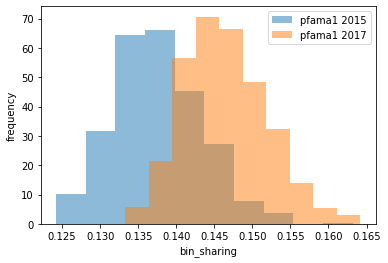

bin_sharing pfcsp 2015: 0.1637815517815518 +/- 0.00622433747062056
bin_sharing pfcsp 2017: 0.19406574074074073 +/- 0.005916300946018482
bin_sharing pfcsp change: 0.03028418895918894 +/- 0.008587490543344449


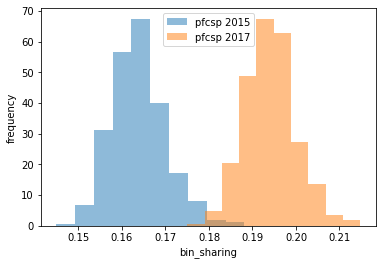

jaccard pfama1 2015: 0.9692988908538571 +/- 0.0017973240318083614
jaccard pfama1 2017: 0.950089570092973 +/- 0.0027285685007447454
jaccard pfama1 change: -0.019209320760884108 +/- 0.003267332205113568


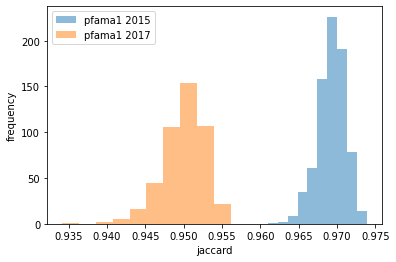

jaccard pfcsp 2015: 0.9689177919214303 +/- 0.0015872871711541678
jaccard pfcsp 2017: 0.963404161075757 +/- 0.0016669635256750532
jaccard pfcsp change: -0.005513630845673356 +/- 0.0023017923363417483


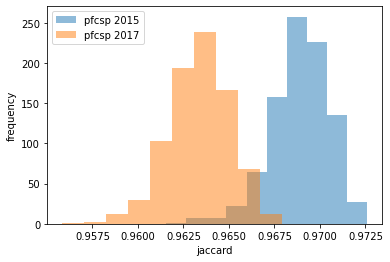

L1 pfama1 2015: 1.946563296022678 +/- 0.0045510344366771925
L1 pfama1 2017: 1.9108996370480649 +/- 0.006739789511220292
L1 pfama1 change: -0.0356636589746131 +/- 0.008132445948137421


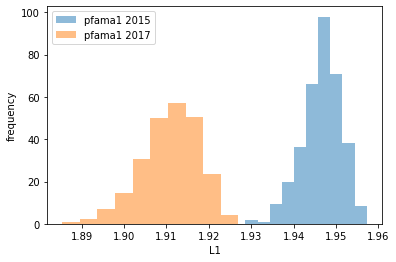

L1 pfcsp 2015: 1.9509466360940488 +/- 0.004159435638901561
L1 pfcsp 2017: 1.9460330264873489 +/- 0.004887082838848846
L1 pfcsp change: -0.0049136096066999535 +/- 0.006417513810498217


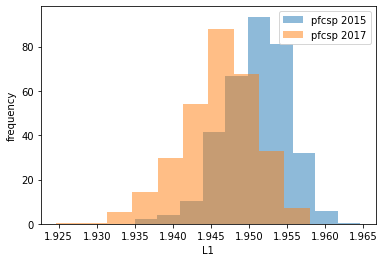

L2 pfama1 2015: 1.2292211510072324 +/- 0.0028024257572502663
L2 pfama1 2017: 1.2996921577450378 +/- 0.004466096486904357
L2 pfama1 change: 0.07047100673780538 +/- 0.005272533352691016


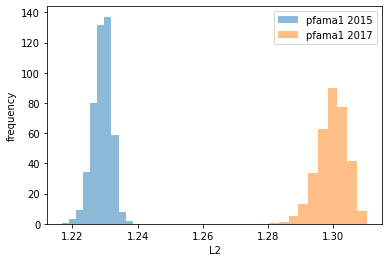

L2 pfcsp 2015: 1.2035313665030136 +/- 0.0025499958785439817
L2 pfcsp 2017: 1.2843015926245902 +/- 0.0033575916007374308
L2 pfcsp change: 0.08077022612157658 +/- 0.0042161475707016985


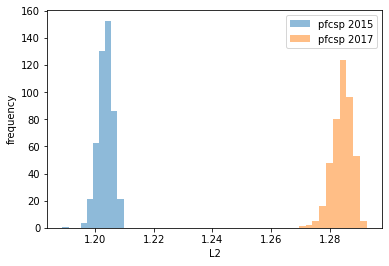

pcorr pfama1 2015: 0.0015034733235644716 +/- 0.002830634017363299
pcorr pfama1 2017: 0.025392375848382272 +/- 0.0036034923566412346
pcorr pfama1 change: 0.0238889025248178 +/- 0.004582318856717207


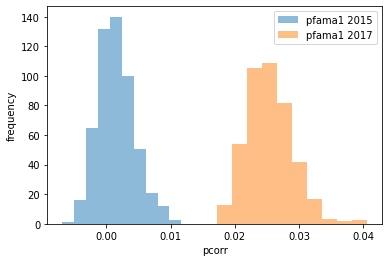

pcorr pfcsp 2015: 0.004403457566023734 +/- 0.0025970997152739645
pcorr pfcsp 2017: 0.009581133427242922 +/- 0.0028256727943713677
pcorr pfcsp change: 0.005177675861219188 +/- 0.0038378840097020393


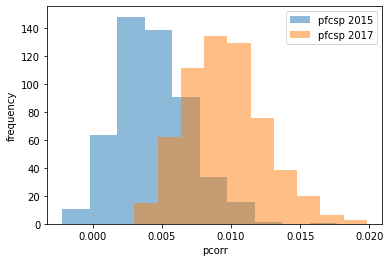

In [164]:
metrics = ['bin_sharing', 'jaccard', 'L1', 'L2', 'pcorr']
ll = 1000
for mm in metrics:
    vals_ama_pre = np.zeros(ll)
    vals_ama_post = np.zeros(ll)
    vals_csp_pre = np.zeros(ll)
    vals_csp_post = np.zeros(ll)
    for i in range(ll):
        shuff_mat = shuffle_samples(genotypes_pre_ama)
        vals_ama_pre[i] = mat_mean_err(relatedness_mat(shuff_mat,shuff_mat, method = mm))[0]
        shuff_mat = shuffle_samples(genotypes_post_ama)
        vals_ama_post[i] = mat_mean_err(relatedness_mat(shuff_mat,shuff_mat, method = mm))[0]
        shuff_mat = shuffle_samples(genotypes_pre_csp)
        vals_csp_pre[i] = mat_mean_err(relatedness_mat(shuff_mat,shuff_mat, method = mm))[0]
        shuff_mat = shuffle_samples(genotypes_post_csp)
        vals_csp_post[i] = mat_mean_err(relatedness_mat(shuff_mat,shuff_mat, method = mm))[0]
    print(mm + " pfama1 2015: " + str(np.mean(vals_ama_pre)) + " +/- " + str(np.std(vals_ama_pre)))
    print(mm + " pfama1 2017: " + str(np.mean(vals_ama_post)) + " +/- " + str(np.std(vals_ama_post)))
    diff = np.mean(vals_ama_post) - np.mean(vals_ama_pre)
    diff_err = np.sqrt(np.std(vals_ama_post)**2. + np.std(vals_ama_pre)**2.)
    print(mm + " pfama1 change: " + str(diff) + " +/- " + str(diff_err))
    plt.hist(vals_ama_pre, density = True, alpha = .5, label = "pfama1 2015")
    plt.hist(vals_ama_post, density = True, alpha = .5, label = "pfama1 2017")
    plt.legend()
    plt.xlabel(mm)
    plt.ylabel("frequency")
    plt.show()
    
    print(mm + " pfcsp 2015: " + str(np.mean(vals_csp_pre)) + " +/- " + str(np.std(vals_csp_pre)))
    print(mm + " pfcsp 2017: " + str(np.mean(vals_csp_post)) + " +/- " + str(np.std(vals_csp_post)))
    diff = np.mean(vals_csp_post) - np.mean(vals_csp_pre)
    diff_err = np.sqrt(np.std(vals_csp_post)**2. + np.std(vals_csp_pre)**2.)
    print(mm + " pfcsp change: " + str(diff) + " +/- " + str(diff_err))
    plt.hist(vals_csp_pre, density = True, alpha = .5, label = "pfcsp 2015")
    plt.hist(vals_csp_post, density = True, alpha = .5, label = "pfcsp 2017")
    plt.legend()
    plt.xlabel(mm)
    plt.ylabel("frequency")
    plt.show()
    

### unused code 

In [6]:
def get_rand_dist(size = 50, distr = 'uniform', sig = 10., mean = 25.):
    """
    This method generate a random distribution of normalized values (total of 1.)
    over the positions of an array.
    
    Parameters:
    -----------
    size: int
        Size of generated array
    distr: str {'uniform', 'normal'}
        It defines how the array indeces are picked (default is uniform)
    sig: float
        Sigma of the distr when it is 'normal'
    mean: float
        Mean of distr when it is 'normal'
    
    Returns:
    --------
    sample: np.array
        The randomly generated sample
    
    Note:
    -----
    The sample is filled by generating uniform random values between [0,1] 
    and adding them to the randomly generated indeces. 
    """
    sample = np.zeros(size)
    cumulative = 0.
    while cumulative < 1:
        r = np.random.rand()
        if cumulative + r > 1:
            r = 1 - cumulative
        if distr == 'uniform':
            randint = np.random.randint(50)
        elif distr == 'normal':
            randint = int(np.random.normal(mean, sig))
            while randint < 0 or randint >= 50:
                randint = int(np.random.normal(mean, sig))
        sample[randint] += r
        cumulative += r
    return sample
    